## Take a look at the data: <a class='anchor' id='back-to-top'></a>
- [Data Insights](#data-insights)  
- [Data Visualization](#data-visualization) 
    - [Submissions analysis](#sub)
    - [Submissions analysis per subreddit](#sub-sr)
    - [Comments analysis](#comm)
    - [Comments analysis per subreddit](#comm-sr)
- [Take a look at the users](#users)
- [Covid related posts](#covid-related-posts)  

In [1]:
import numpy as np
import pandas as pd
import tqdm
import os
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.style as style 
import seaborn as sns
%matplotlib inline

import datetime as dt
import ciso8601

from datetime import timedelta
from pprintpp import pprint as pp
from termcolor import colored
from wordcloud import WordCloud, STOPWORDS
from statistics import mean

sns.set_style('darkgrid')
sns.set_context('paper')
style.use('ggplot')
matplotlib.rcParams['font.family'] = 'helvetica'
matplotlib.rcParams['figure.titlesize'] = 'large'

In [2]:
def import_submissions():
    path = './submissions_scraped/'
    files = []
    for filename in os.listdir(path):
        files.append(pd.read_csv(os.path.join(path, filename)))

    files = pd.concat(files)
    df_submissions = pd.DataFrame(files)
    df_submissions.drop(columns=['Unnamed: 0'], inplace=True)
    
    return df_submissions

In [3]:
def import_comments():
    df_comments = pd.read_csv('./comments_scraped/comments.csv')
    df_comments.drop(columns=['Unnamed: 0'], inplace=True)
    return df_comments

In [4]:
def import_submissions_previous():
    path = './submissions_scraped_previous/'
    files = []
    for filename in os.listdir(path):
        files.append(pd.read_csv(os.path.join(path, filename)))

    files = pd.concat(files)
    df_submissions = pd.DataFrame(files)
    df_submissions.drop(columns=['Unnamed: 0'], inplace=True)
    
    return df_submissions

In [5]:
def import_comments_previous():
    df_comments = pd.read_csv('./comments_scraped_previous/comments.csv')
    df_comments.drop(columns=['Unnamed: 0'], inplace=True)
    return df_comments

In [6]:
# Data before 12-2020
df_sub_prev = import_submissions_previous()
df_comm_prev = import_comments_previous()

# Data after 12-2020
df_sub_aft = import_submissions()
df_comm_aft = import_comments()

df_submissions = pd.concat([df_sub_prev, df_sub_aft])
df_comments = pd.concat([df_comm_prev, df_comm_aft])

## Data Insights <a class="anchor" id="data-insights"></a>

[Back to top](#back-to-top)

In [7]:
subreddits = ['CrohnsDisease', 'IBD', 'UlcerativeColitis', 'ibs']
colors = ['#cc5a49', '#4586ac', '#9e97cc', '#777777']

df_submissions['created'] = pd.to_datetime(df_submissions['created'])
df_comments['created'] = pd.to_datetime(df_comments['created'])
df_comments = df_comments[df_comments['created'] < dt.datetime(2022, 10, 1)]

df_crohns = df_submissions[df_submissions['subreddit'] == 'CrohnsDisease']
df_ibs = df_submissions[df_submissions['subreddit'] == 'ibs']
df_ibd = df_submissions[df_submissions['subreddit'] == 'IBD']
df_ulc = df_submissions[df_submissions['subreddit'] == 'UlcerativeColitis']

crohns_comments_scraped = df_comments[df_comments['subreddit'] == 'CrohnsDisease']['id'].count()
ulc_comments_scraped = df_comments[df_comments['subreddit'] == 'UlcerativeColitis']['id'].count()
ibs_comments_scraped = df_comments[df_comments['subreddit'] == 'ibs']['id'].count()
ibd_comments_scraped = df_comments[df_comments['subreddit'] == 'IBD']['id'].count()

In [8]:
print(colored('SUBMISSIONS\n', color='blue', attrs=['bold']))

print(f'\tNumber of subsmissions:\t\t{df_submissions.shape[0]}\n')
print(f'\tNumber of authors:\t\t{df_submissions.author.isnull().sum()}\n')
print('\tW\ at least 1 comment:\t\t', len(df_submissions[df_submissions['num_comments'] > 0]), '\n')

print(colored('COMMENTS\n', color='blue', attrs=['bold']))

print(f'\tNumber of comments:\t\t{df_comments.shape[0]}\n')

print(colored('SUBREDDITS\n', color='blue', attrs=['bold']))
print(f'\tSubreddits scraped: \t{subreddits}\n')

print(colored('\tr/CrohnsDisease\n', color='blue'))
print(f'\t\tNumber of submissions:\t{df_crohns.shape[0]}\n')
print(f'\t\tComments scraped:\t{crohns_comments_scraped}\n')
unique_authors = df_crohns.shape[0] - df_crohns.author.isnull().sum()
print(f'\t\tUnique authors in sr:\t{unique_authors}\n')

print(colored('\tr/UlcerativeColitis\n', color='blue'))
print(f'\t\tNumber of submissions:\t{df_ulc.shape[0]}\n')
print(f'\t\tComments scraped:\t{ulc_comments_scraped}\n')
unique_authors = df_ulc.shape[0] - df_ulc.author.isnull().sum()
print(f'\t\tUnique authors in sr:\t{unique_authors}\n')

print(colored('\tr/ibs\n', color='blue'))
print(f'\t\tNumber of submissions:\t{df_ibs.shape[0]}\n')
print(f'\t\tComments scraped:\t{ibs_comments_scraped}\n')
unique_authors = df_ibs.shape[0] - df_ibs.author.isnull().sum()
print(f'\t\tUnique authors in sr:\t{unique_authors}\n')

print(colored('\tr/IBD\n', color='blue'))
print(f'\t\tNumber of submissions:\t{df_ibd.shape[0]}\n')
print(f'\t\tComments scraped:\t{ibd_comments_scraped}\n')
unique_authors = df_ibd.shape[0] - df_ibd.author.isnull().sum()
print(f'\t\tUnique authors in sr:\t{unique_authors}\n')

print(colored('EMPTY VALUES SUBMISSIONS\n', color='blue', attrs=['bold']))
print(df_submissions.isnull().sum().sort_values(ascending = False), '\n')

print(colored('EMPTY VALUES COMMENTS\n', color='blue', attrs=['bold']))
print(df_comments.isnull().sum().sort_values(ascending = False), '\n')

SUBMISSIONS

	Number of subsmissions:		119369

	Number of authors:		37159

	W\ at least 1 comment:		 104663 

COMMENTS

	Number of comments:		499901

SUBREDDITS

	Subreddits scraped: 	['CrohnsDisease', 'IBD', 'UlcerativeColitis', 'ibs']

	r/CrohnsDisease

		Number of submissions:	34709

		Comments scraped:	179839

		Unique authors in sr:	25247

	r/UlcerativeColitis

		Number of submissions:	23654

		Comments scraped:	113314

		Unique authors in sr:	17983

	r/ibs

		Number of submissions:	55489

		Comments scraped:	184604

		Unique authors in sr:	35134

	r/IBD

		Number of submissions:	5517

		Comments scraped:	22144

		Unique authors in sr:	3846

EMPTY VALUES SUBMISSIONS

author          37159
url             32602
body            15048
title               0
score               0
id                  0
subreddit           0
num_comments        0
created             0
dtype: int64 

EMPTY VALUES COMMENTS

author       32077
parent_id        0
score            0
id               0
subredd

## Data Visualization <a class="anchor" id="data-visualization"></a>

[Back to top](#back-to-top)

### Submissions analysis <a class='anchor' id='sub'>

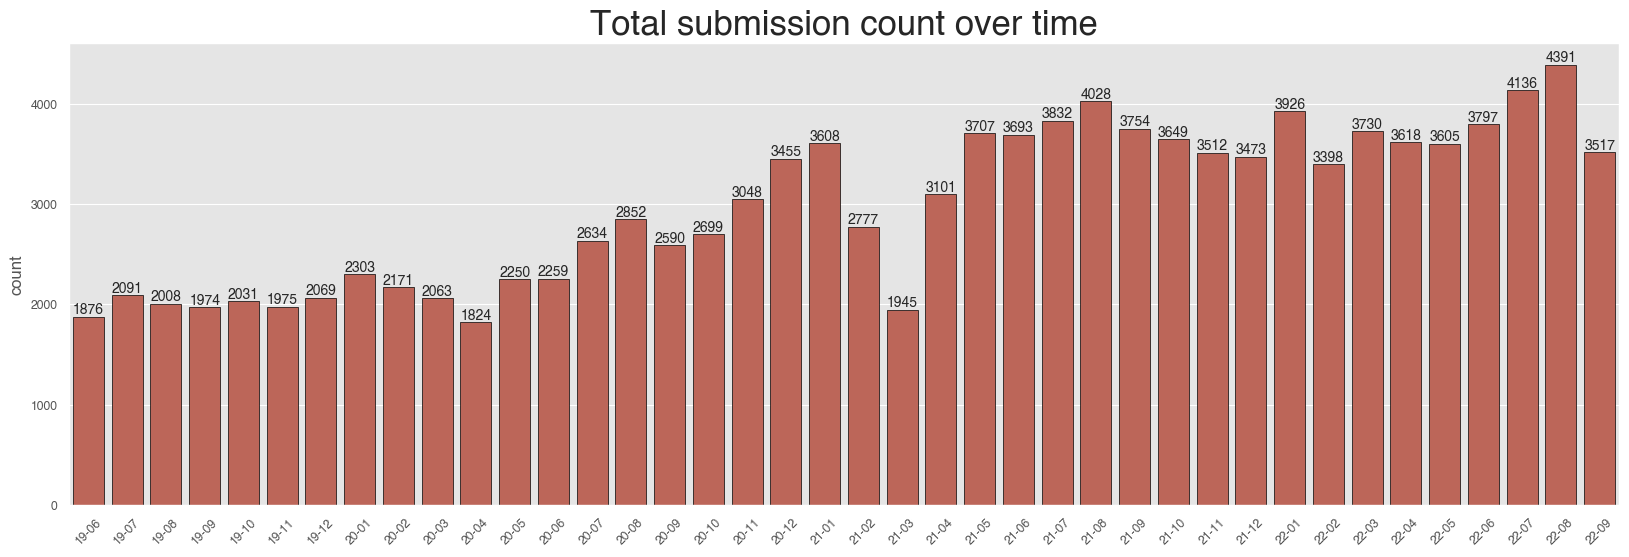

In [9]:
submissions_per_month = df_submissions['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts')

plt.figure(figsize=(20,6))
ax = sns.barplot(x='index', y='counts', data=submissions_per_month, edgecolor='black', color=colors[0])
plt.title('Total submission count over time', fontsize=25)
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.xticks(rotation=45)

plt.show()

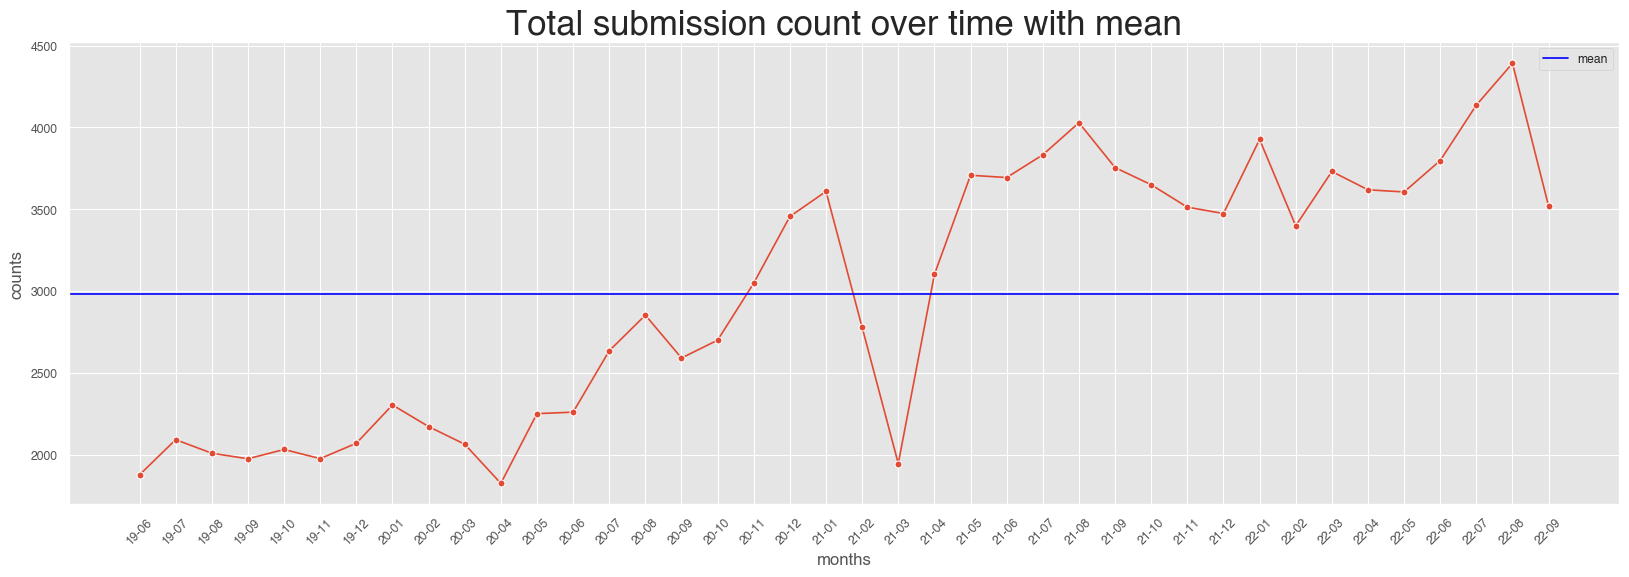

In [10]:
submissions_per_month = df_submissions['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts')

subs_per_month_df = pd.DataFrame(submissions_per_month)

subs_per_month_df = subs_per_month_df.rename(columns={'index': 'months'}).reset_index()

plt.figure(figsize=(20, 6))
plt.title('Total submission count over time with mean', fontsize=25)
sns.lineplot(x=subs_per_month_df.months, y=subs_per_month_df.counts, marker='o', markersize=5);
plt.xticks(rotation = 45)
plt.axhline(subs_per_month_df.counts.mean(), color='b', label='mean')

plt.legend()
plt.show();

### Submission analysis per subreddit <a class='anchor' id='sub-sr'>

In [11]:
df_c = df_submissions.copy()
df_c.created = df_c.created.apply(lambda x: x.strftime('%y-%m')) 

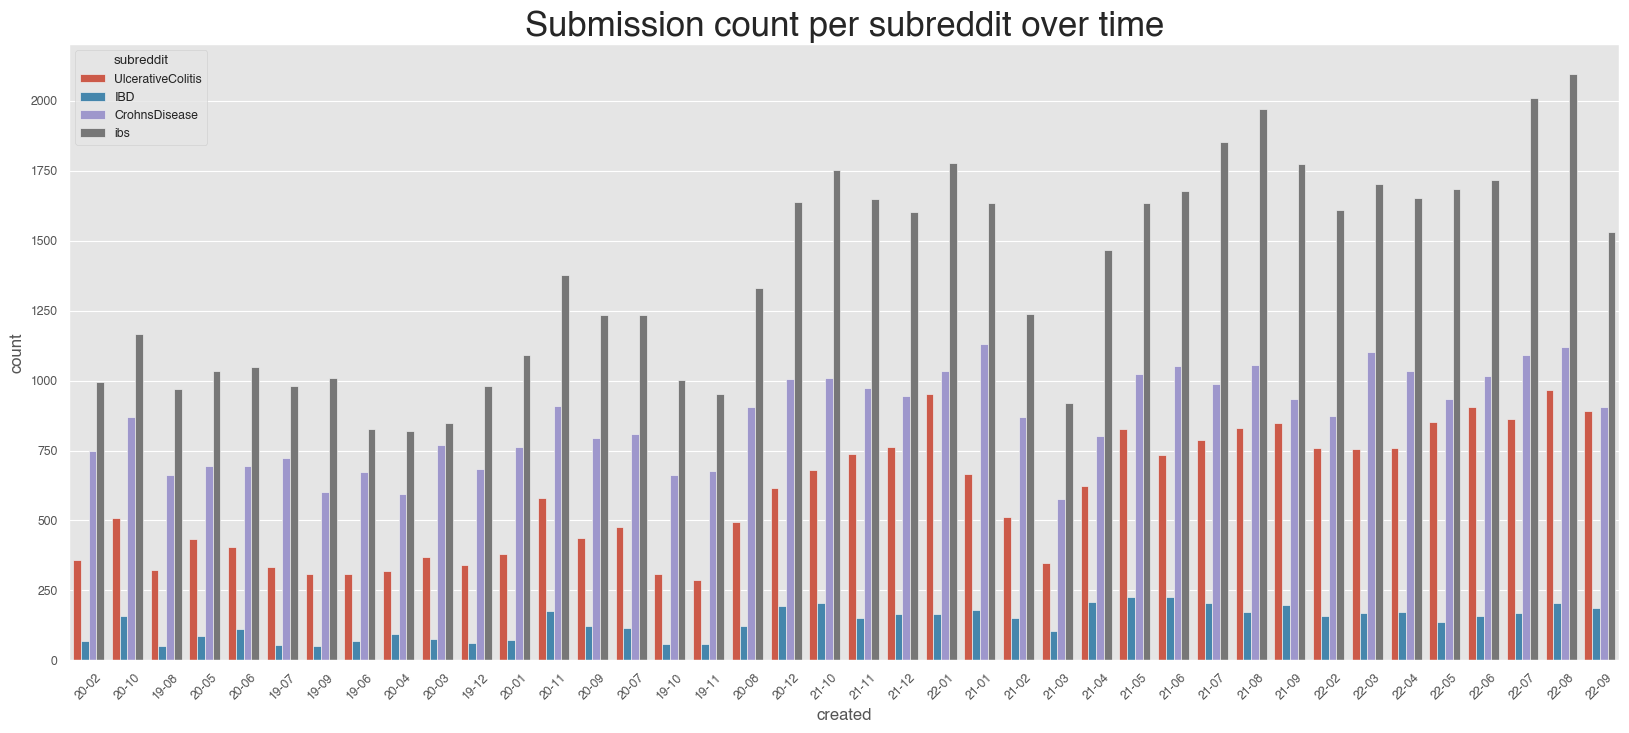

In [12]:
fig, ax = plt.subplots(figsize=(20,8), ncols=1, nrows=1)

plt.title('Submission count per subreddit over time', fontsize=25)
sns.countplot(data=df_c, x='created', hue='subreddit', ax=ax)
plt.xticks(rotation=45)

plt.show();

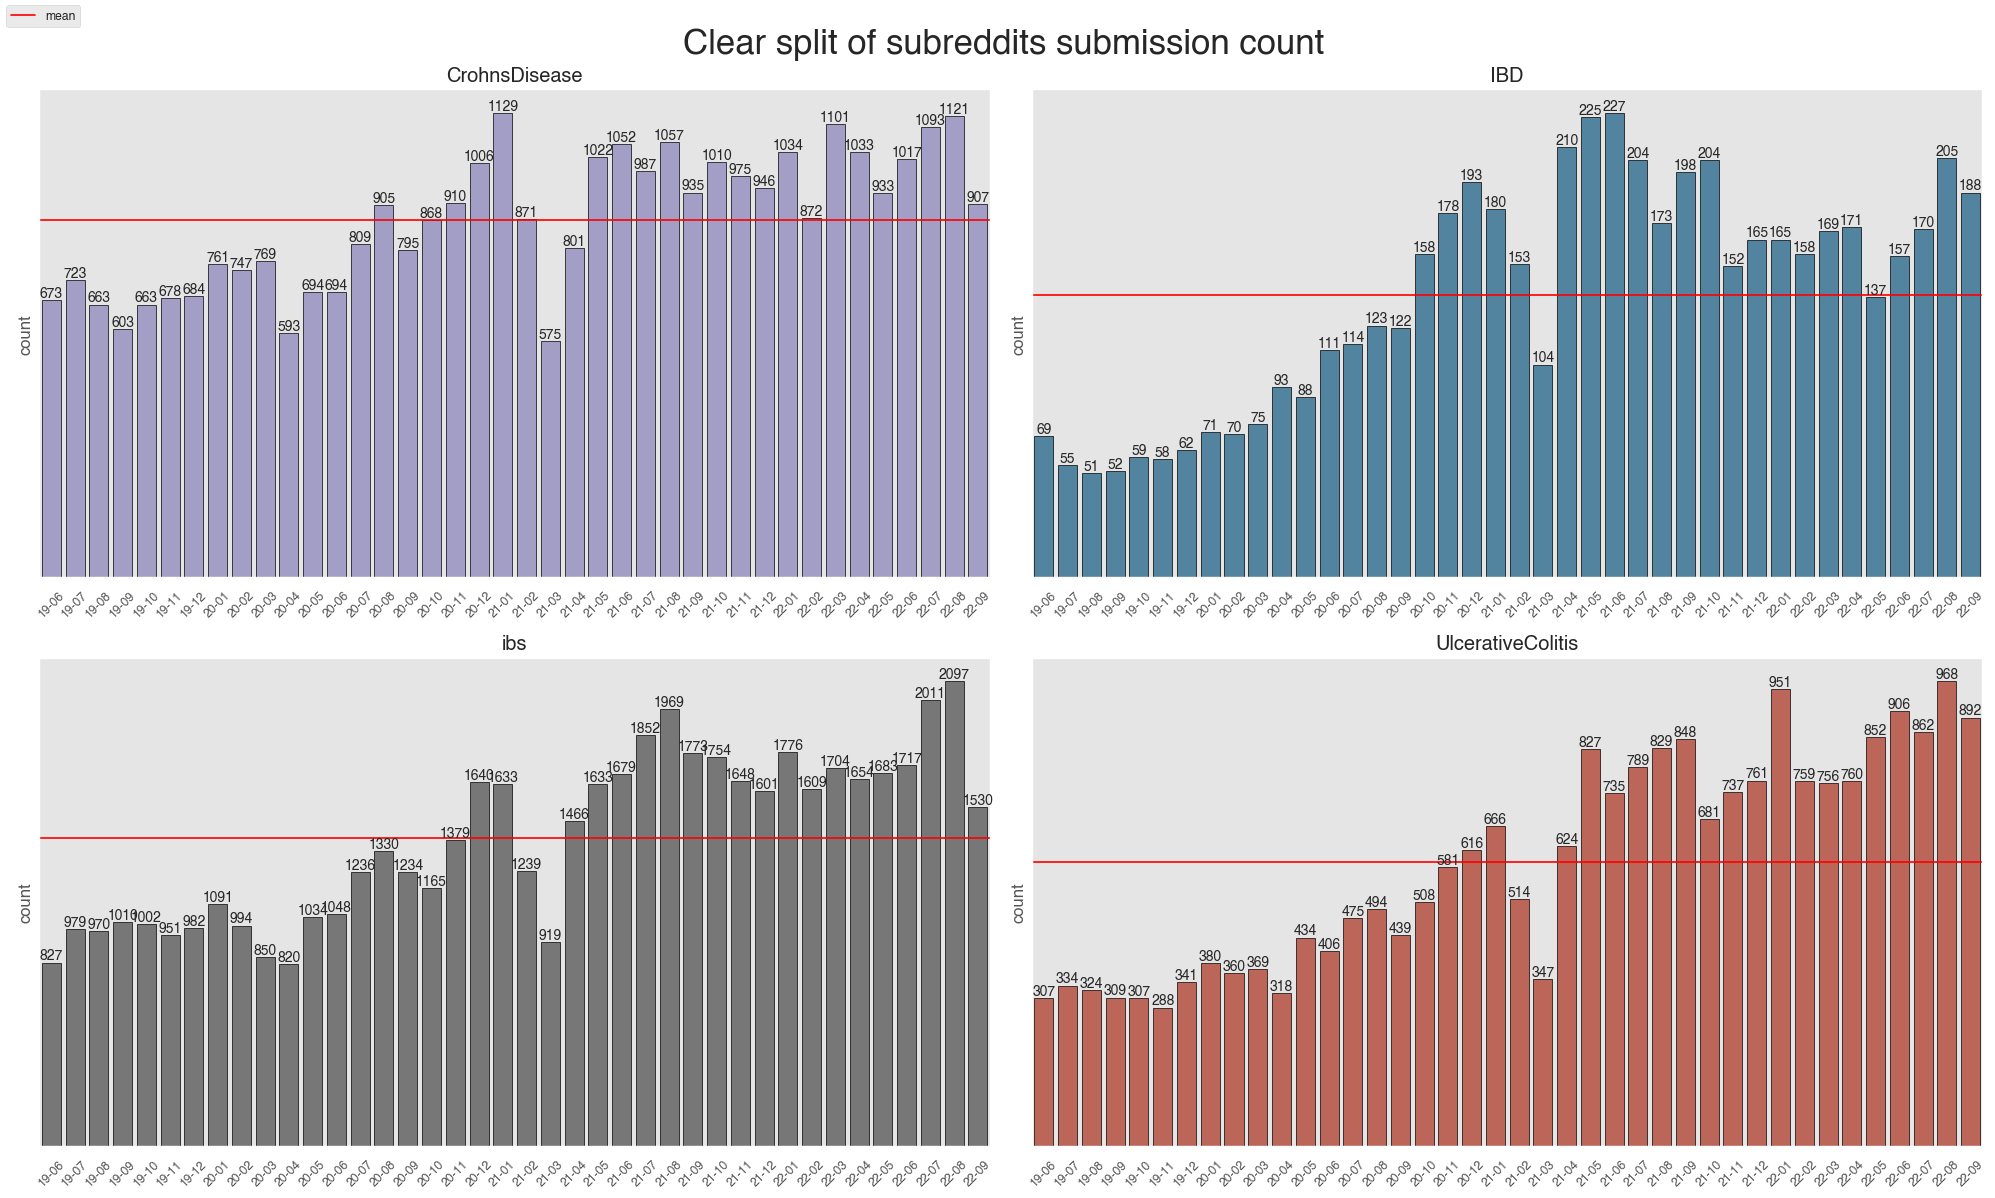

In [13]:
subs_per_month_per_subreddits = []
subs_per_month_per_subreddits.append(df_crohns['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
subs_per_month_per_subreddits.append(df_ibd['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
subs_per_month_per_subreddits.append(df_ibs['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
subs_per_month_per_subreddits.append(df_ulc['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(figsize=(20,12), nrows=2, ncols=2)

plt.suptitle('Clear split of subreddits submission count', fontsize=25)

ax1 = sns.barplot(x='index', y='counts', data=subs_per_month_per_subreddits[0], edgecolor='black', color=colors[2], ax=ax1)
ax1.set_title('CrohnsDisease')
ax1.set_yticks([])
ax1.bar_label(ax1.containers[0])
ax1.set_ylabel('count')
ax1.set_xlabel('')
ax1.axhline(subs_per_month_per_subreddits[0].counts.mean(), color='r')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

ax2 = sns.barplot(x='index', y='counts', data=subs_per_month_per_subreddits[1], edgecolor='black', color=colors[1], ax=ax2)
ax2.set_title('IBD')
ax2.set_yticks([])
ax2.bar_label(ax2.containers[0])
ax2.set_ylabel('count')
ax2.set_xlabel('')
ax2.axhline(subs_per_month_per_subreddits[1].counts.mean(), color='r')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

ax3 = sns.barplot(x='index', y='counts', data=subs_per_month_per_subreddits[2], edgecolor='black', color=colors[3], ax=ax3)
ax3.set_title('ibs')
ax3.set_yticks([])
ax3.bar_label(ax3.containers[0])
ax3.set_ylabel('count')
ax3.set_xlabel('')
ax3.axhline(subs_per_month_per_subreddits[2].counts.mean(), color='r')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

ax4 = sns.barplot(x='index', y='counts', data=subs_per_month_per_subreddits[3], edgecolor='black', color=colors[0], ax=ax4)
ax4.set_title('UlcerativeColitis')
ax4.set_yticks([])
ax4.bar_label(ax4.containers[0])
ax4.set_ylabel('count')
ax4.set_xlabel('')
ax4.axhline(subs_per_month_per_subreddits[3].counts.mean(), color='r', label='mean')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

fig.legend(loc='upper left')
fig.tight_layout()
plt.show()

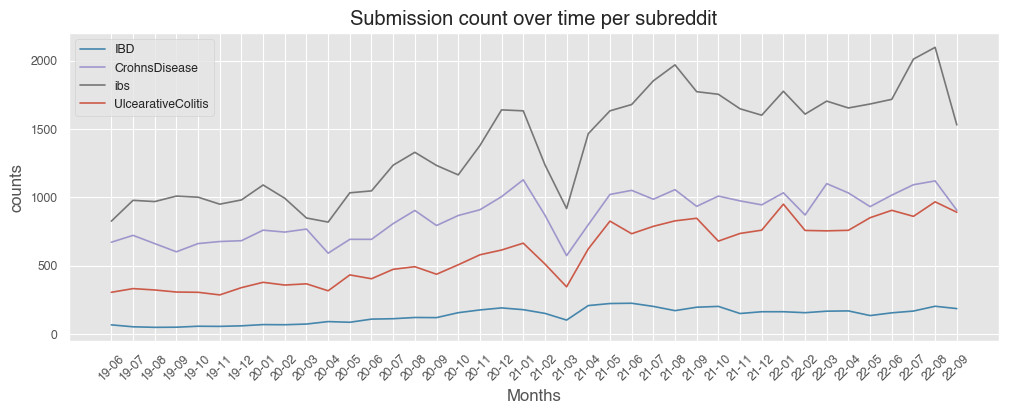

In [14]:
subs_per_month_per_subreddits = []
subs_per_month_per_subreddits.append(df_crohns['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
subs_per_month_per_subreddits.append(df_ibd['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
subs_per_month_per_subreddits.append(df_ibs['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
subs_per_month_per_subreddits.append(df_ulc['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))

plt.figure(figsize=(12, 4))
plt.title('Submission count over time per subreddit')

sns.lineplot(x='index', y='counts', data=subs_per_month_per_subreddits[1], label='IBD', color=colors[1]);
plt.xticks(rotation = 45)

sns.lineplot(x='index', y='counts', data=subs_per_month_per_subreddits[0], label='CrohnsDisease', color=colors[2]);
plt.xticks(rotation = 45)

sns.lineplot(x='index', y='counts', data=subs_per_month_per_subreddits[2], label='ibs', color=colors[3]);
plt.xticks(rotation = 45)

sns.lineplot(x='index', y='counts', data=subs_per_month_per_subreddits[3], label='UlcearativeColitis', color=colors[0]);
plt.xticks(rotation = 45)

plt.xlabel('Months')
plt.show();


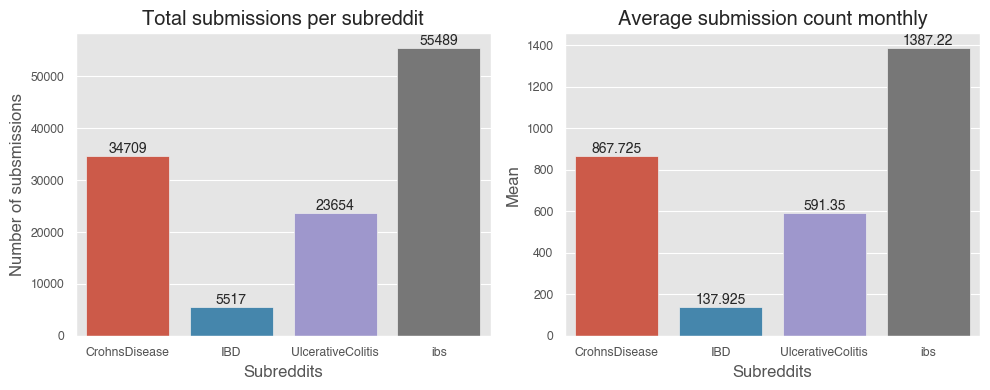

In [15]:
fig, [ax1, ax2] = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
sns.barplot(x=subreddits, y=df_submissions.subreddit.value_counts().sort_index(), ax=ax1)
ax1.set_title('Total submissions per subreddit')
ax1.set_ylabel('Number of subsmissions')
ax1.bar_label(ax1.containers[0])
ax1.set_xlabel('Subreddits')

sns.barplot(x=subreddits, y=df_submissions.subreddit.value_counts().sort_index() / len(df_submissions['created'].dt.strftime('%y-%m').value_counts()), ax=ax2)
ax2.set_title('Average submission count monthly')
ax2.set_ylabel('Mean')
ax2.set_xlabel('Subreddits')
ax2.bar_label(ax2.containers[0])

plt.tight_layout()
plt.show();

### Comments analysis <a class='anchor' id='comm'>

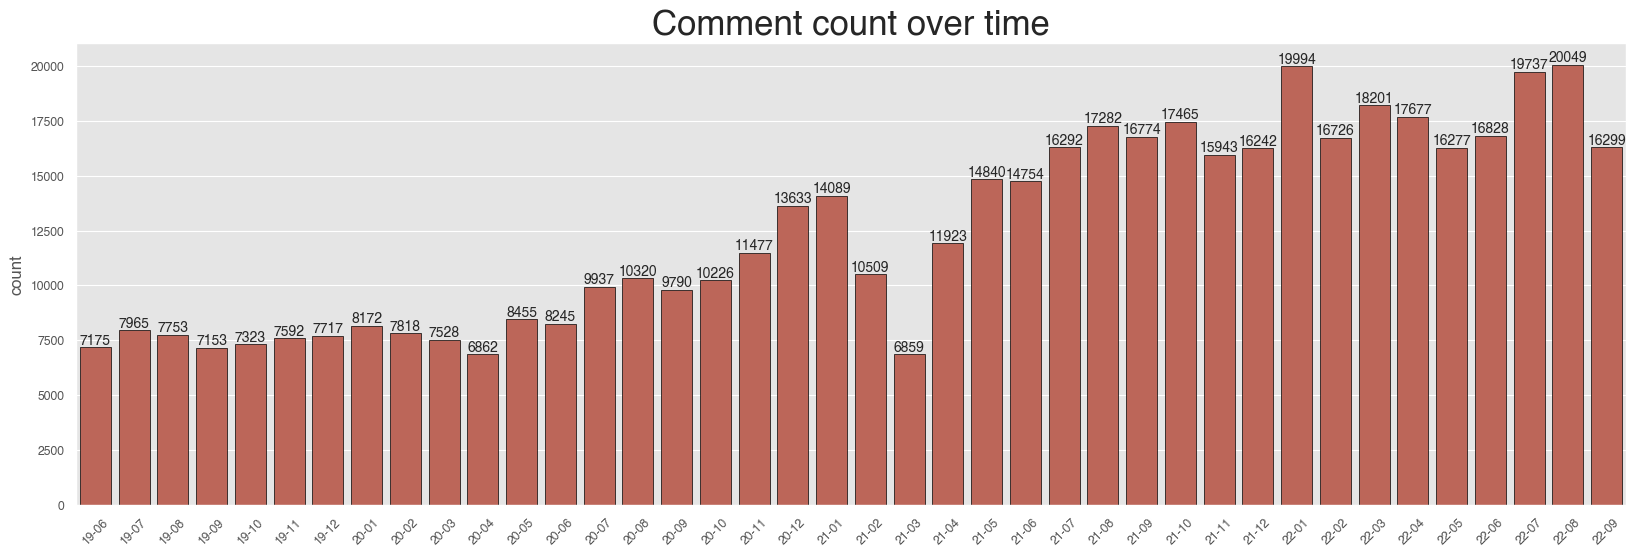

In [16]:
comments_per_month = df_comments['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts')

plt.figure(figsize=(20,6))
ax = sns.barplot(x='index', y='counts', data=comments_per_month, edgecolor='black', color=colors[0])
plt.title('Comment count over time', fontsize=25)
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.xticks(rotation=45)

plt.show()

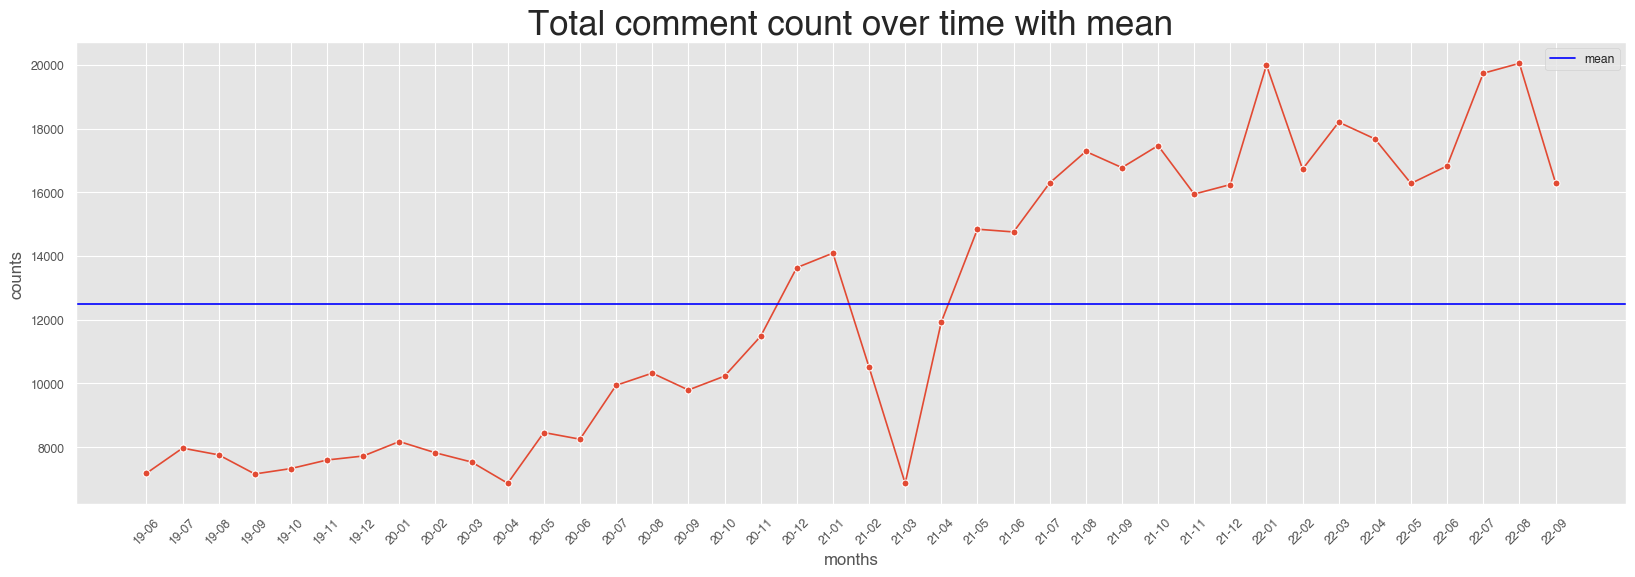

In [17]:
comments_per_month = df_comments['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts')

comm_per_month_df = pd.DataFrame(comments_per_month)

comm_per_month_df = comm_per_month_df.rename(columns={'index': 'months'}).reset_index()

plt.figure(figsize=(20, 6))
plt.title('Total comment count over time with mean', fontsize=25)
sns.lineplot(x=comm_per_month_df.months, y=comm_per_month_df.counts, marker='o', markersize=5);
plt.xticks(rotation = 45)
plt.axhline(comm_per_month_df.counts.mean(), color='b', label='mean')

plt.legend()
plt.show();

### Comment analysis per subreddit <a class='anchor' id='comm-sr'>

In [18]:
df_c_c = df_comments.copy()
df_c_c.created = df_c_c.created.apply(lambda x: x.strftime('%y-%m'))
df_c_c.sort_values('created', inplace=True)

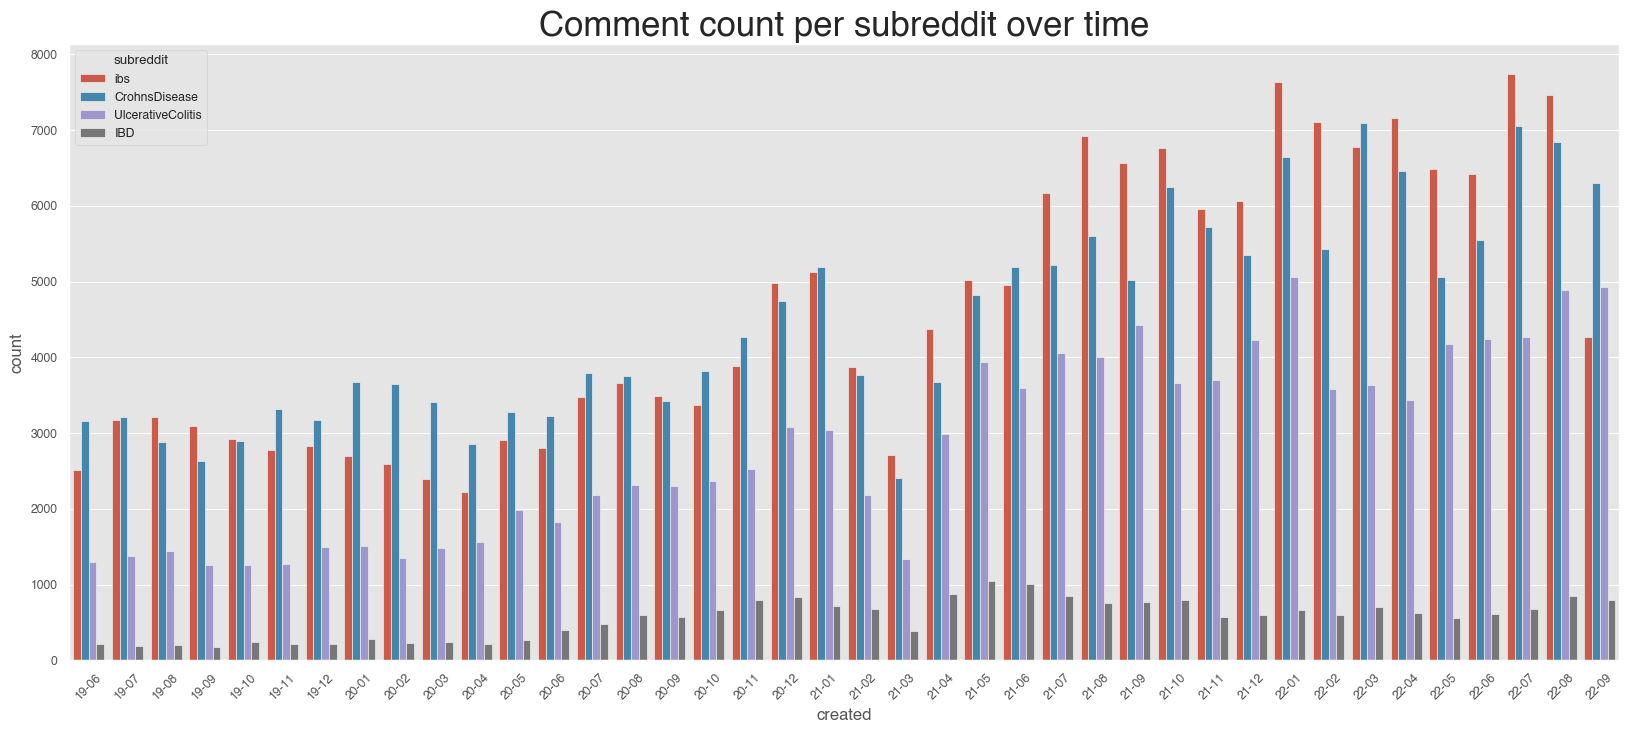

In [19]:
fig, ax = plt.subplots(figsize=(20,8))

plt.title('Comment count per subreddit over time', fontsize=25)
sns.countplot(data=df_c_c, hue='subreddit', x='created')
plt.xticks(rotation=45)

plt.show();

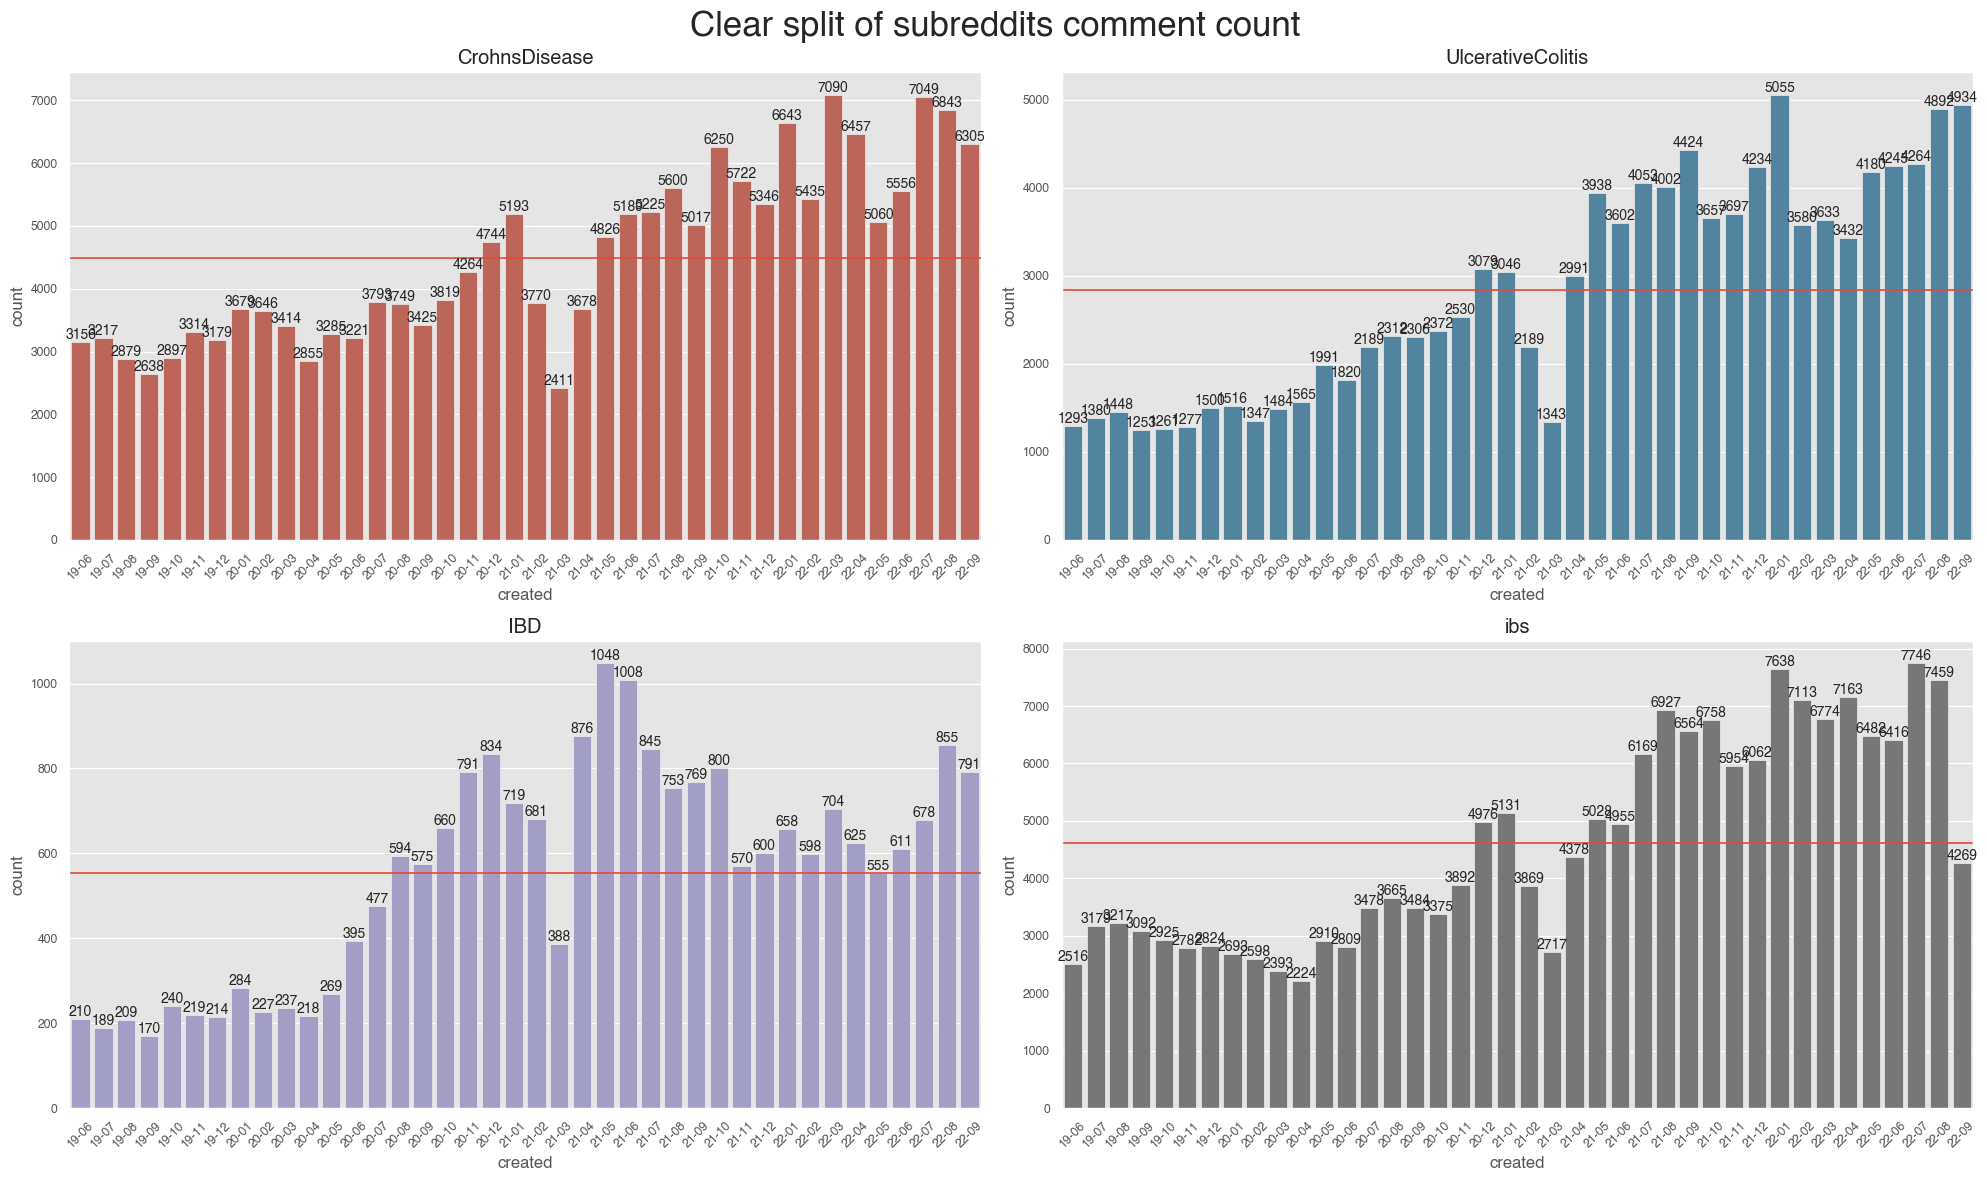

In [20]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(figsize=(20,12), nrows=2, ncols=2)

plt.suptitle('Clear split of subreddits comment count', fontsize=25)

comm_crohn = df_c_c[df_c_c['subreddit'] == 'CrohnsDisease']
sns.countplot(data=comm_crohn, x='created', ax=ax1, color=colors[0])
ax1.axhline(mean(df_c_c[df_c_c['subreddit'] == 'CrohnsDisease'].groupby('created').count().id))
ax1.set_title('CrohnsDisease')
ax1.bar_label(ax1.containers[0])
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

comm_ulc = df_c_c[df_c_c['subreddit'] == 'UlcerativeColitis']
sns.countplot(data=comm_ulc, x='created', ax=ax2, color=colors[1])
ax2.axhline(mean(df_c_c[df_c_c['subreddit'] == 'UlcerativeColitis'].groupby('created').count().id))
ax2.set_title('UlcerativeColitis')
ax2.bar_label(ax2.containers[0])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

comm_ibd = df_c_c[df_c_c['subreddit'] == 'IBD']
sns.countplot(data=comm_ibd, x='created', ax=ax3, color=colors[2])
ax3.axhline(mean(df_c_c[df_c_c['subreddit'] == 'IBD'].groupby('created').count().id))
ax3.set_title('IBD')
ax3.bar_label(ax3.containers[0])
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

comm_ibs = df_c_c[df_c_c['subreddit'] == 'ibs']
sns.countplot(data=comm_ibs, x='created', ax=ax4, color=colors[3])
ax4.axhline(mean(df_c_c[df_c_c['subreddit'] == 'ibs'].groupby('created').count().id))
ax4.set_title('ibs')
ax4.bar_label(ax4.containers[0])
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()
plt.show();

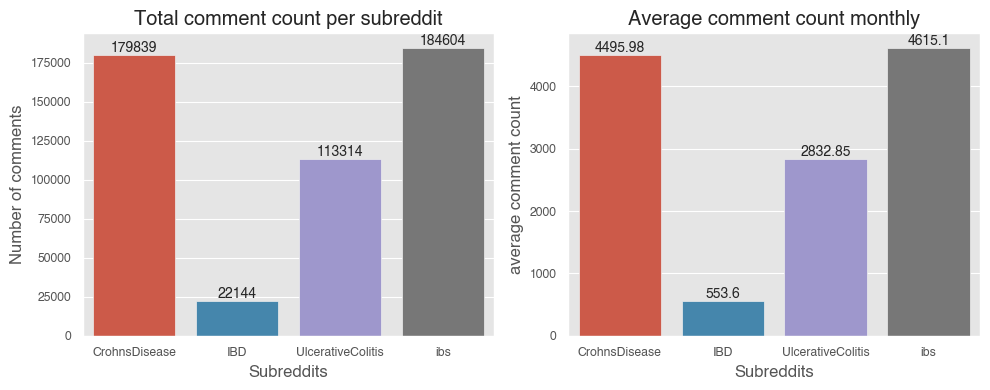

In [21]:
fig, [ax1, ax2] = plt.subplots(figsize=(10,4), ncols=2, nrows=1)

sns.barplot(x=subreddits, y=df_comments.groupby('subreddit')['id'].count().sort_index(), ax=ax1)

ax1.set_title('Total comment count per subreddit')
ax1.set_ylabel('Number of comments')
ax1.set_xlabel('Subreddits')
ax1.bar_label(ax1.containers[0])

sns.barplot(x=subreddits, y=df_comments.subreddit.value_counts().sort_index() / len(df_comments['created'].dt.strftime('%y-%m').value_counts()), ax=ax2)
ax2.set_title('Average comment count monthly')
ax2.set_xlabel('Subreddits')
ax2.set_ylabel('average comment count')
ax2.bar_label(ax2.containers[0])

plt.tight_layout()
plt.show();

### Take a look at the users <a class='anchor' id='users'></a>

How many unique authors per each subreddit ?

In [22]:
df_sub_author = df_submissions[df_submissions.author.notna()]
df_comm_author = df_comments[df_comments.author.notna()]

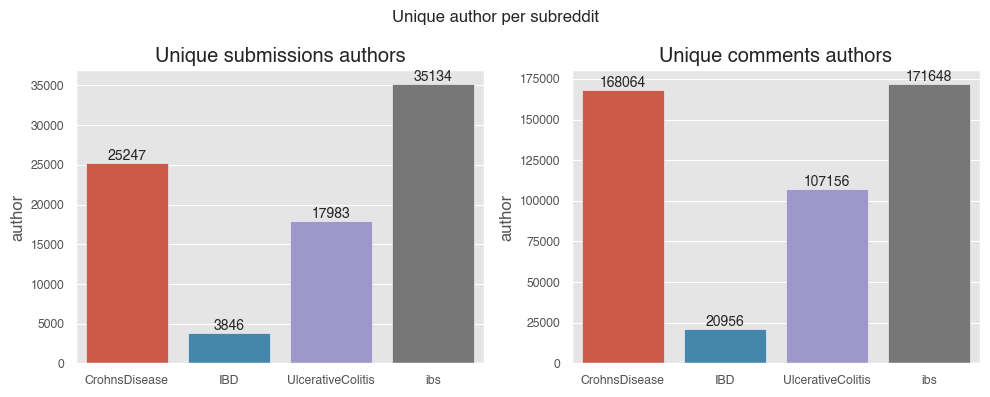

In [23]:
fig, [ax1, ax2] = plt.subplots(figsize=(10,4), ncols=2, nrows=1)

plt.suptitle('Unique author per subreddit')

ax1.set_title('Unique submissions authors')
sns.barplot(x=subreddits, y=df_sub_author.groupby('subreddit').count().author, ax=ax1)
ax1.bar_label(ax1.containers[0])

ax2.set_title('Unique comments authors')
sns.barplot(x=subreddits, y=df_comm_author.groupby('subreddit').count().author, ax=ax2)
ax2.bar_label(ax2.containers[0])

plt.tight_layout()
plt.show();

Who are the more active users in each subreddit ?

In [24]:
sub_crohn_users = df_sub_author[df_sub_author['subreddit'] == 'CrohnsDisease'].groupby('author').count().sort_values('created', ascending=False).iloc[0:20].reset_index()
sub_ibs_users = df_sub_author[df_sub_author['subreddit'] == 'ibs'].groupby('author').count().sort_values('created', ascending=False).iloc[0:20].reset_index()
sub_ibd_users = df_sub_author[df_sub_author['subreddit'] == 'IBD'].groupby('author').count().sort_values('created', ascending=False).iloc[0:20].reset_index()
sub_ulc_users = df_sub_author[df_sub_author['subreddit'] == 'UlcerativeColitis'].groupby('author').count().sort_values('created', ascending=False).iloc[0:20].reset_index()

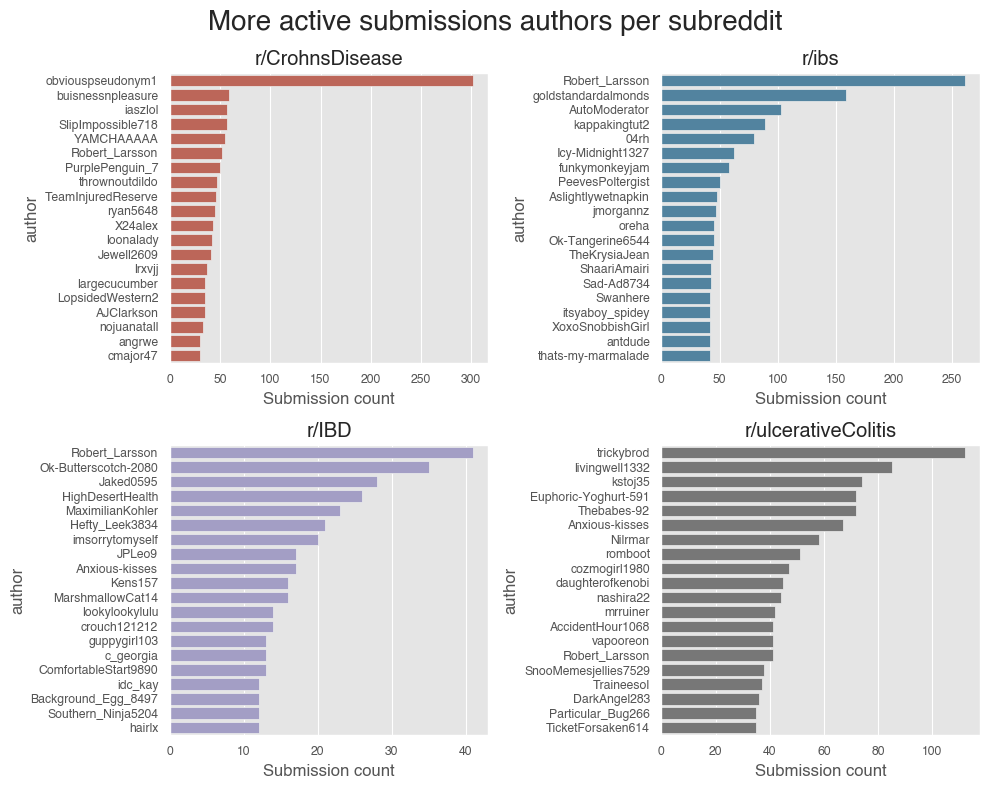

In [25]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(figsize=(10, 8), ncols=2, nrows=2)

plt.suptitle('More active submissions authors per subreddit', fontsize=20)

sns.barplot(y=sub_crohn_users.author, x=sub_crohn_users.created, ax=ax1, orient='h', color=colors[0])
ax1.set_title('r/CrohnsDisease')
ax1.set_xlabel('Submission count')

sns.barplot(y=sub_ibs_users.author, x=sub_ibs_users.created, ax=ax2, orient='h', color=colors[1])
ax2.set_title('r/ibs')
ax2.set_xlabel('Submission count')

sns.barplot(y=sub_ibd_users.author, x=sub_ibd_users.created, ax=ax3, orient='h', color=colors[2])
ax3.set_title('r/IBD')
ax3.set_xlabel('Submission count')

sns.barplot(y=sub_ulc_users.author, x=sub_ulc_users.created, ax=ax4, orient='h', color=colors[3])
ax4.set_title('r/ulcerativeColitis')
ax4.set_xlabel('Submission count')

plt.tight_layout()
plt.show();

In [26]:
comm_crohn_users = df_comm_author[df_comm_author['subreddit'] == 'CrohnsDisease'].groupby('author').count().sort_values('created', ascending=False).iloc[0:20].reset_index()
comm_ibs_users = df_comm_author[df_comm_author['subreddit'] == 'ibs'].groupby('author').count().sort_values('created', ascending=False).iloc[0:20].reset_index()
comm_ibd_users = df_comm_author[df_comm_author['subreddit'] == 'IBD'].groupby('author').count().sort_values('created', ascending=False).iloc[0:20].reset_index()
comm_ulc_users = df_comm_author[df_comm_author['subreddit'] == 'UlcerativeColitis'].groupby('author').count().sort_values('created', ascending=False).iloc[0:20].reset_index()

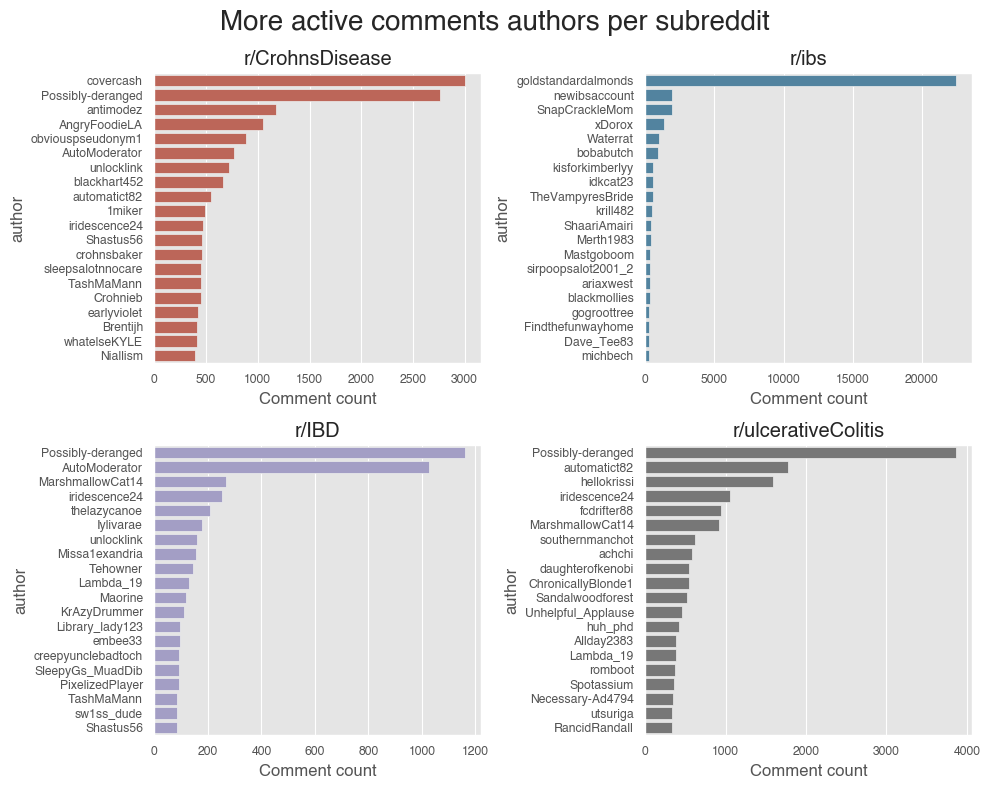

In [27]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(figsize=(10, 8), ncols=2, nrows=2)

plt.suptitle('More active comments authors per subreddit', fontsize=20)

sns.barplot(y=comm_crohn_users.author, x=comm_crohn_users.created, ax=ax1, orient='h', color=colors[0])
ax1.set_title('r/CrohnsDisease')
ax1.set_xlabel('Comment count')

sns.barplot(y=comm_ibs_users.author, x=comm_ibs_users.created, ax=ax2, orient='h', color=colors[1])
ax2.set_title('r/ibs')
ax2.set_xlabel('Comment count')

sns.barplot(y=comm_ibd_users.author, x=comm_ibd_users.created, ax=ax3, orient='h', color=colors[2])
ax3.set_title('r/IBD')
ax3.set_xlabel('Comment count')

sns.barplot(y=comm_ulc_users.author, x=comm_ulc_users.created, ax=ax4, orient='h', color=colors[3])
ax4.set_title('r/ulcerativeColitis')
ax4.set_xlabel('Comment count')

plt.tight_layout()
plt.show();

## Covid Related Posts <a class='anchor' id='covid-related-posts'></a>

[Back to top](#back-to-top)

In [28]:
covid_keywords = [
    "Pandemic",
    "pandemic",
    "coronavirus" ,
    "CORONAVIRUS",
    "Coronavirus",
    "COVID-19",
    "COVID19",
    "COVID",
    "COVID 19",
    "covid-19",
    "covid19",
    "covid",
    "covid 19",
    "Covid-19",
    "Covid19",
    "Covid",
    "Covid 19",
    "Vaccine",
    "vaccine"
    "SARS-COV-2",
    "SARS COV-2",
    "SARS-COV2",
    "SARS-COV 2",
    "SARS COV"
]

In [29]:
pattern = '|'.join([f'{keyword}' for keyword in covid_keywords])

In [30]:
df_submissions = df_submissions[df_submissions['body'].notna()]
df_submissions = df_submissions[df_submissions['body'] != '']
df_filtered_covid = df_submissions[df_submissions.body.str.contains(pattern)].copy()

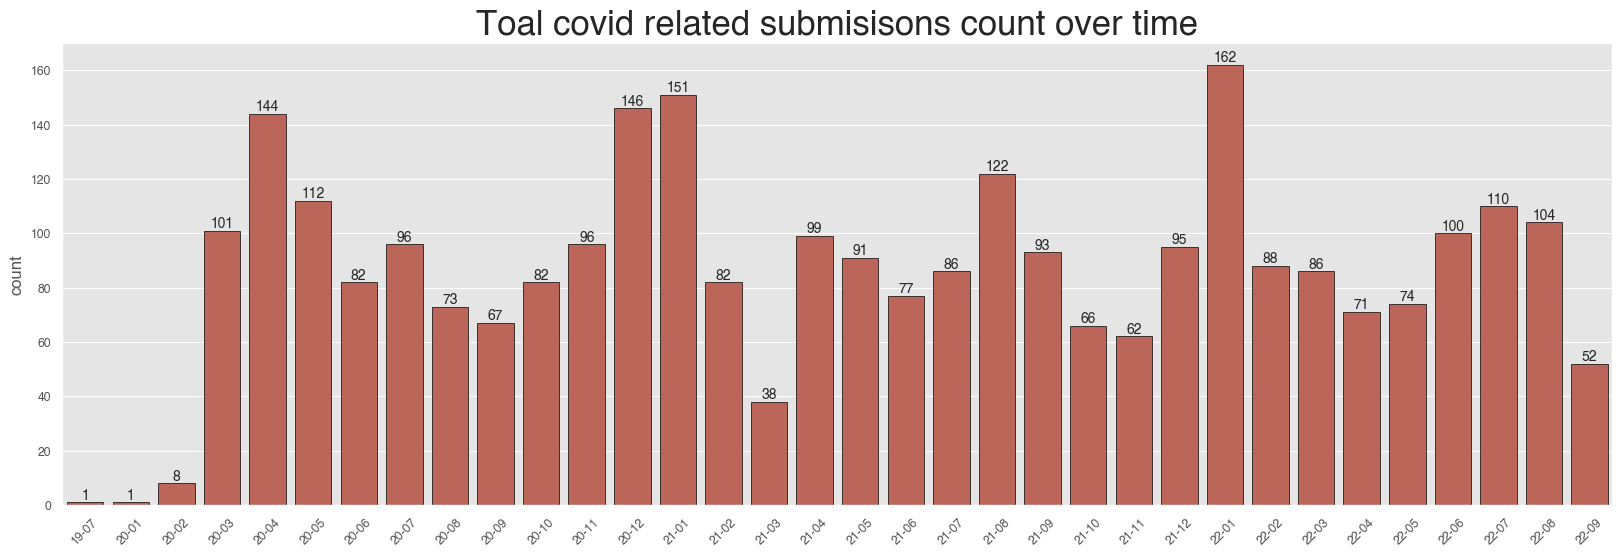

In [31]:
covid_submissions_per_month = df_filtered_covid['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts')

plt.figure(figsize=(20,6))

ax = sns.barplot(x='index', y='counts', data=covid_submissions_per_month, edgecolor='black', color=colors[0])
plt.title('Toal covid related submisisons count over time', fontsize=25)
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.xticks(rotation=45)

plt.show();

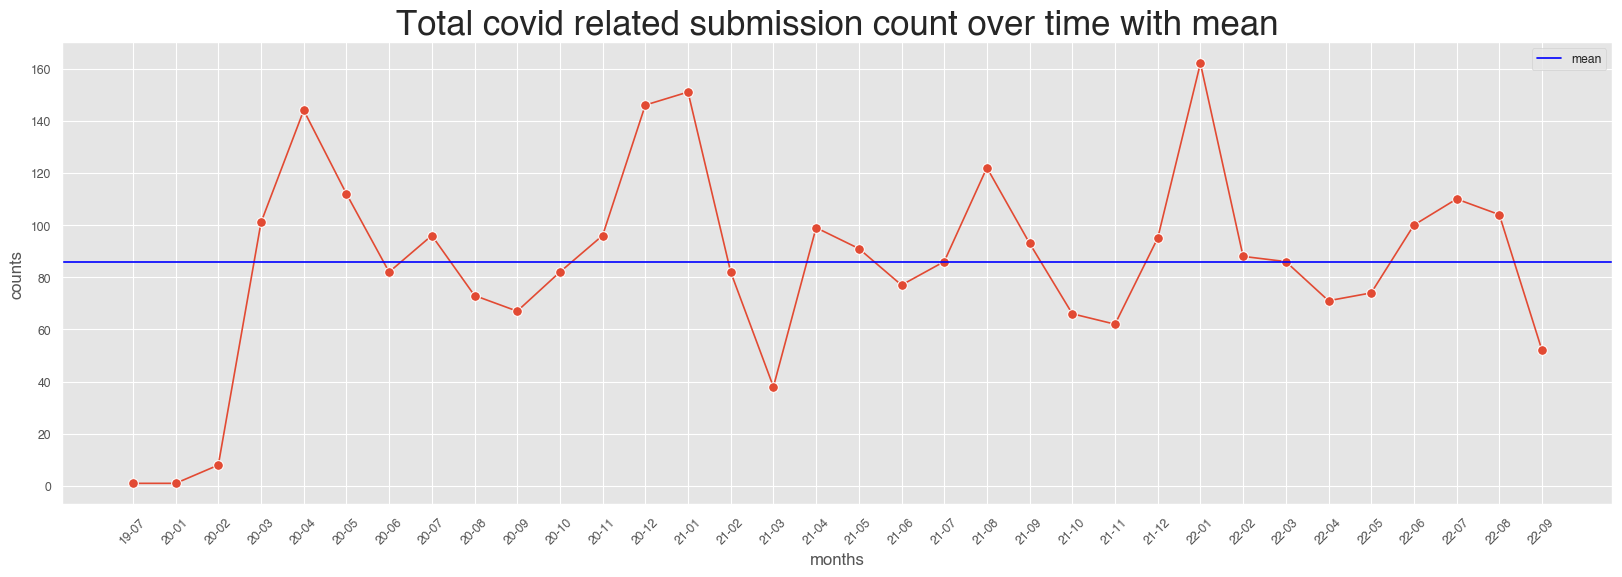

In [32]:
cov_submissions_per_month = df_filtered_covid['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts')

cov_subs_per_month_df = pd.DataFrame(cov_submissions_per_month)

cov_subs_per_month_df = cov_subs_per_month_df.rename(columns={'index': 'months'}).reset_index()

plt.figure(figsize=(20, 6))
plt.title('Total covid related submission count over time with mean', fontsize=25)
sns.lineplot(x=cov_subs_per_month_df.months, y=cov_subs_per_month_df.counts, marker='o', markersize=7);
plt.xticks(rotation = 45)
plt.axhline(cov_subs_per_month_df.counts.mean(), color='b', label='mean')

plt.legend()
plt.show();

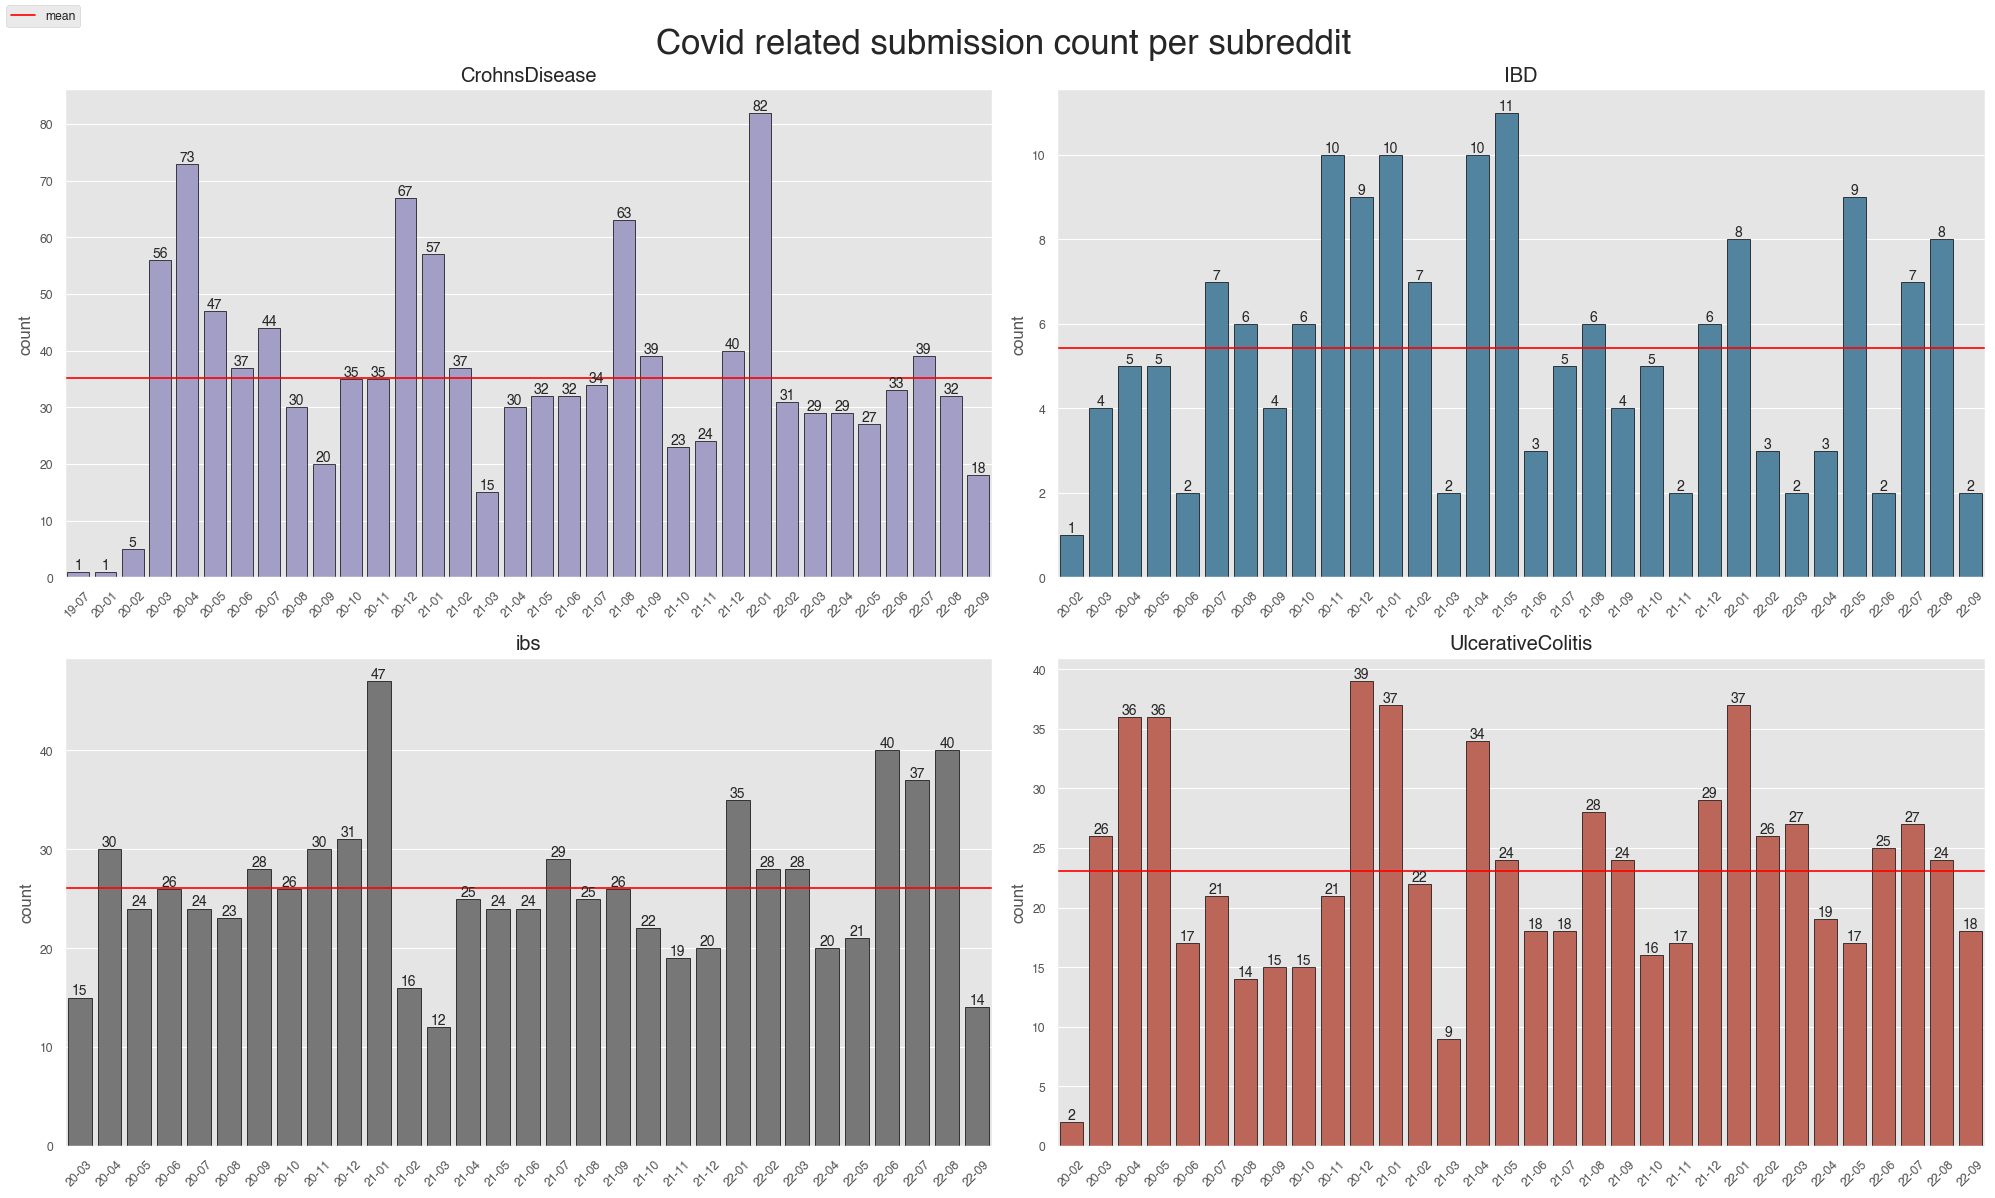

In [33]:
df_crohns_filt = df_filtered_covid[df_filtered_covid['subreddit'] == 'CrohnsDisease']
df_ibd_filt = df_filtered_covid[df_filtered_covid['subreddit'] == 'IBD']
df_ibs_filt = df_filtered_covid[df_filtered_covid['subreddit'] == 'ibs']
df_ulc_filt = df_filtered_covid[df_filtered_covid['subreddit'] == 'UlcerativeColitis']

cov_subs_per_month_per_subreddits = []
cov_subs_per_month_per_subreddits.append(df_crohns_filt['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
cov_subs_per_month_per_subreddits.append(df_ibd_filt['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
cov_subs_per_month_per_subreddits.append(df_ibs_filt['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
cov_subs_per_month_per_subreddits.append(df_ulc_filt['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(figsize=(20,12), nrows=2, ncols=2)

plt.suptitle('Covid related submission count per subreddit', fontsize=25)

ax1 = sns.barplot(x='index', y='counts', data=cov_subs_per_month_per_subreddits[0], edgecolor='black', color=colors[2], ax=ax1)
ax1.set_title('CrohnsDisease')
ax1.bar_label(ax1.containers[0])
ax1.set_ylabel('count')
ax1.set_xlabel('')
ax1.axhline(cov_subs_per_month_per_subreddits[0].counts.mean(), color='r')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

ax2 = sns.barplot(x='index', y='counts', data=cov_subs_per_month_per_subreddits[1], edgecolor='black', color=colors[1], ax=ax2)
ax2.set_title('IBD')
ax2.bar_label(ax2.containers[0])
ax2.set_ylabel('count')
ax2.set_xlabel('')
ax2.axhline(cov_subs_per_month_per_subreddits[1].counts.mean(), color='r')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

ax3 = sns.barplot(x='index', y='counts', data=cov_subs_per_month_per_subreddits[2], edgecolor='black', color=colors[3], ax=ax3)
ax3.set_title('ibs')
ax3.bar_label(ax3.containers[0])
ax3.set_ylabel('count')
ax3.set_xlabel('')
ax3.axhline(cov_subs_per_month_per_subreddits[2].counts.mean(), color='r')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

ax4 = sns.barplot(x='index', y='counts', data=cov_subs_per_month_per_subreddits[3], edgecolor='black', color=colors[0], ax=ax4)
ax4.set_title('UlcerativeColitis')
ax4.bar_label(ax4.containers[0])
ax4.set_ylabel('count')
ax4.set_xlabel('')
ax4.axhline(cov_subs_per_month_per_subreddits[3].counts.mean(), color='r', label='mean')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

fig.legend(loc='upper left')
fig.tight_layout()
plt.show()

In [34]:
df_c_covid = df_filtered_covid.copy()
df_c_covid.created = df_c_covid.created.apply(lambda x: x.strftime('%y-%m')) 
df_c_covid.sort_values('created', inplace=True)

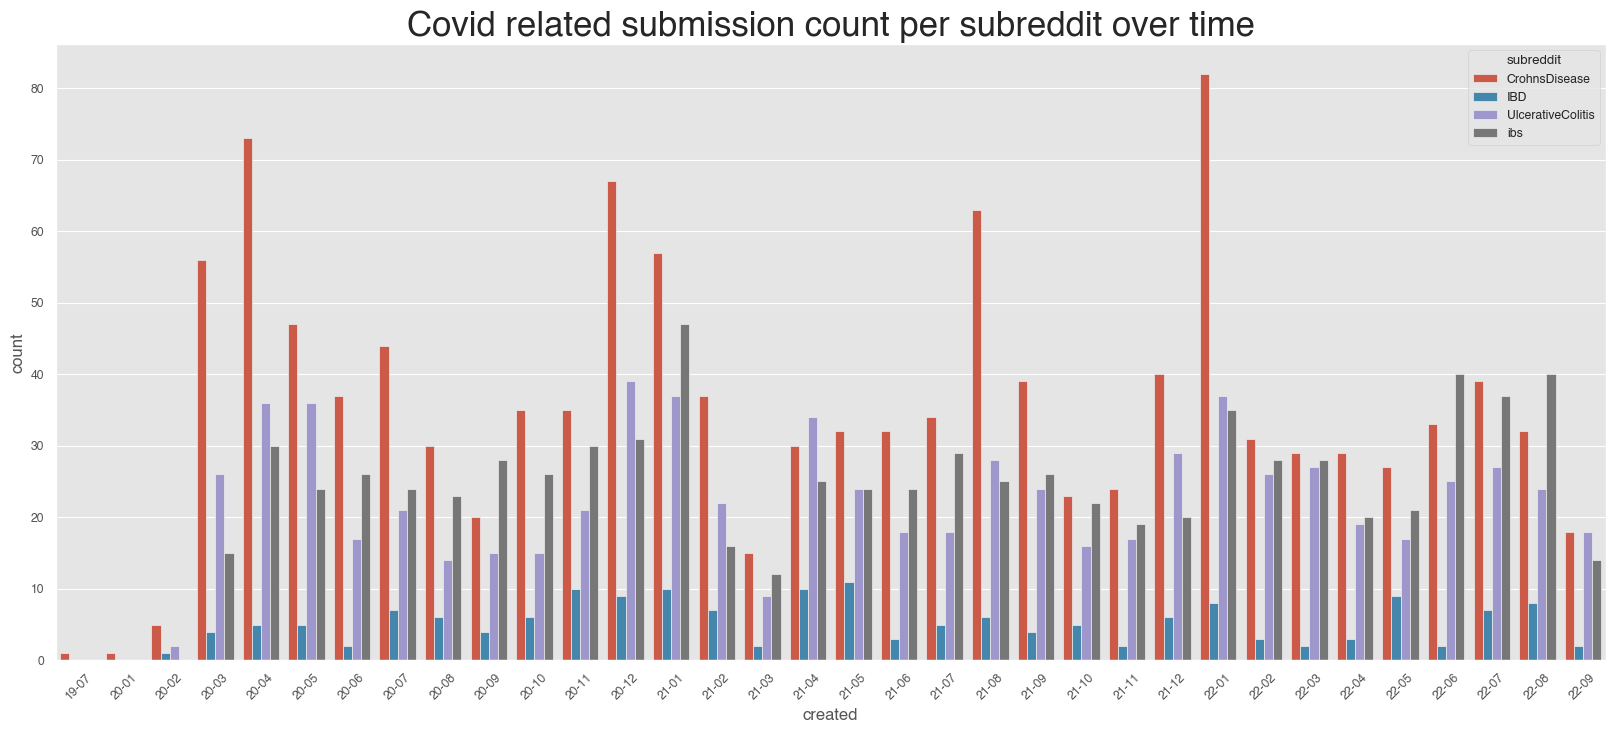

In [35]:
fig, ax = plt.subplots(figsize=(20,8), ncols=1, nrows=1)

plt.title('Covid related submission count per subreddit over time', fontsize=25)
sns.countplot(data=df_c_covid, x='created', hue='subreddit', ax=ax)
plt.xticks(rotation=45)

plt.show();

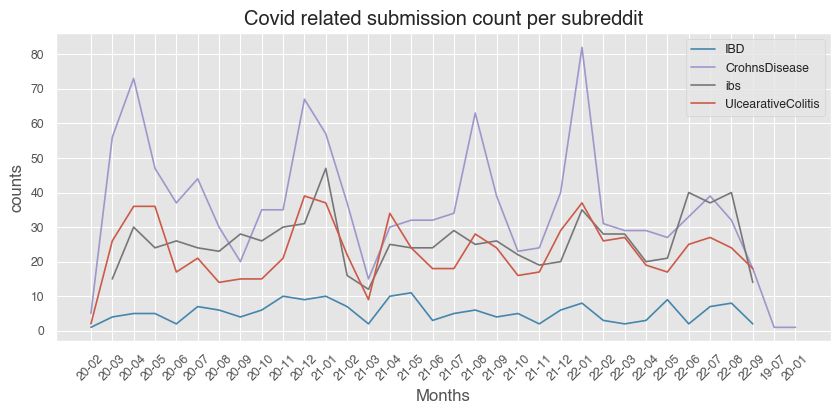

In [36]:
cov_subs_per_month_per_subreddits = []
cov_subs_per_month_per_subreddits.append(df_crohns_filt['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
cov_subs_per_month_per_subreddits.append(df_ibd_filt['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
cov_subs_per_month_per_subreddits.append(df_ibs_filt['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
cov_subs_per_month_per_subreddits.append(df_ulc_filt['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))

plt.figure(figsize=(10, 4))
plt.title('Covid related submission count per subreddit')

sns.lineplot(x='index', y='counts', data=cov_subs_per_month_per_subreddits[1], label='IBD', color=colors[1]);
plt.xticks(rotation = 45)

sns.lineplot(x='index', y='counts', data=cov_subs_per_month_per_subreddits[0], label='CrohnsDisease', color=colors[2]);
plt.xticks(rotation = 45)

sns.lineplot(x='index', y='counts', data=cov_subs_per_month_per_subreddits[2], label='ibs', color=colors[3]);
plt.xticks(rotation = 45)

sns.lineplot(x='index', y='counts', data=cov_subs_per_month_per_subreddits[3], label='UlcearativeColitis', color=colors[0]);
plt.xticks(rotation = 45)

plt.xlabel('Months')
plt.show();

In [37]:
df_comments = df_comments[df_comments['body'].notna()]
df_comments = df_comments[df_comments['body'] != '']
df_comm_filtered = df_comments[df_comments.body.str.contains(pattern)].copy()

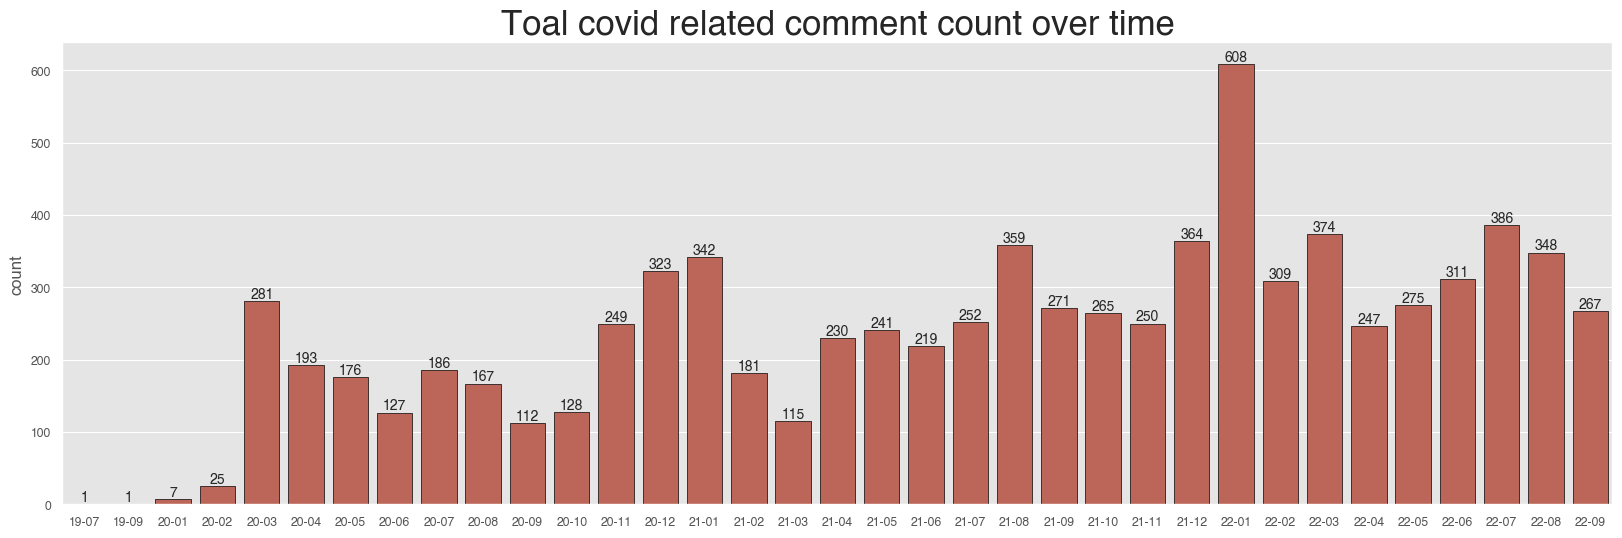

In [38]:
covid_comments_per_month = df_comm_filtered['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts')

plt.figure(figsize=(20,6))
ax = sns.barplot(x='index', y='counts', data=covid_comments_per_month, edgecolor='black', color=colors[0])
plt.title('Toal covid related comment count over time', fontsize=25)
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')

plt.show();

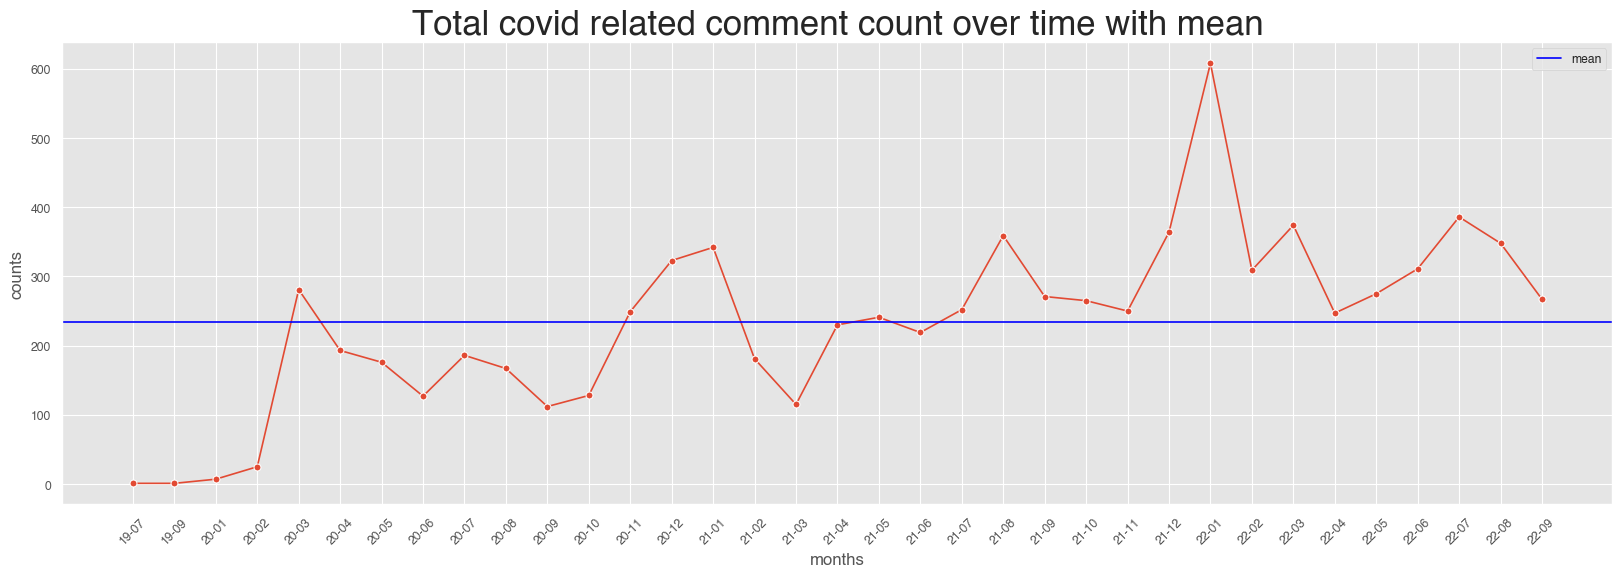

In [39]:
cov_comments_per_month = df_comm_filtered['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts')

cov_comm_per_month_df = pd.DataFrame(cov_comments_per_month)

cov_comm_per_month_df = cov_comm_per_month_df.rename(columns={'index': 'months'}).reset_index()

plt.figure(figsize=(20, 6))
plt.title('Total covid related comment count over time with mean', fontsize=25)
sns.lineplot(x=cov_comm_per_month_df.months, y=cov_comm_per_month_df.counts, marker='o', markersize=5);
plt.xticks(rotation = 45)
plt.axhline(cov_comm_per_month_df.counts.mean(), color='b', label='mean')

plt.legend()
plt.show();

In [40]:
df_c_comm_covid = df_comm_filtered.copy()
df_c_comm_covid.created = df_c_comm_covid.created.apply(lambda x: x.strftime('%y-%m'))

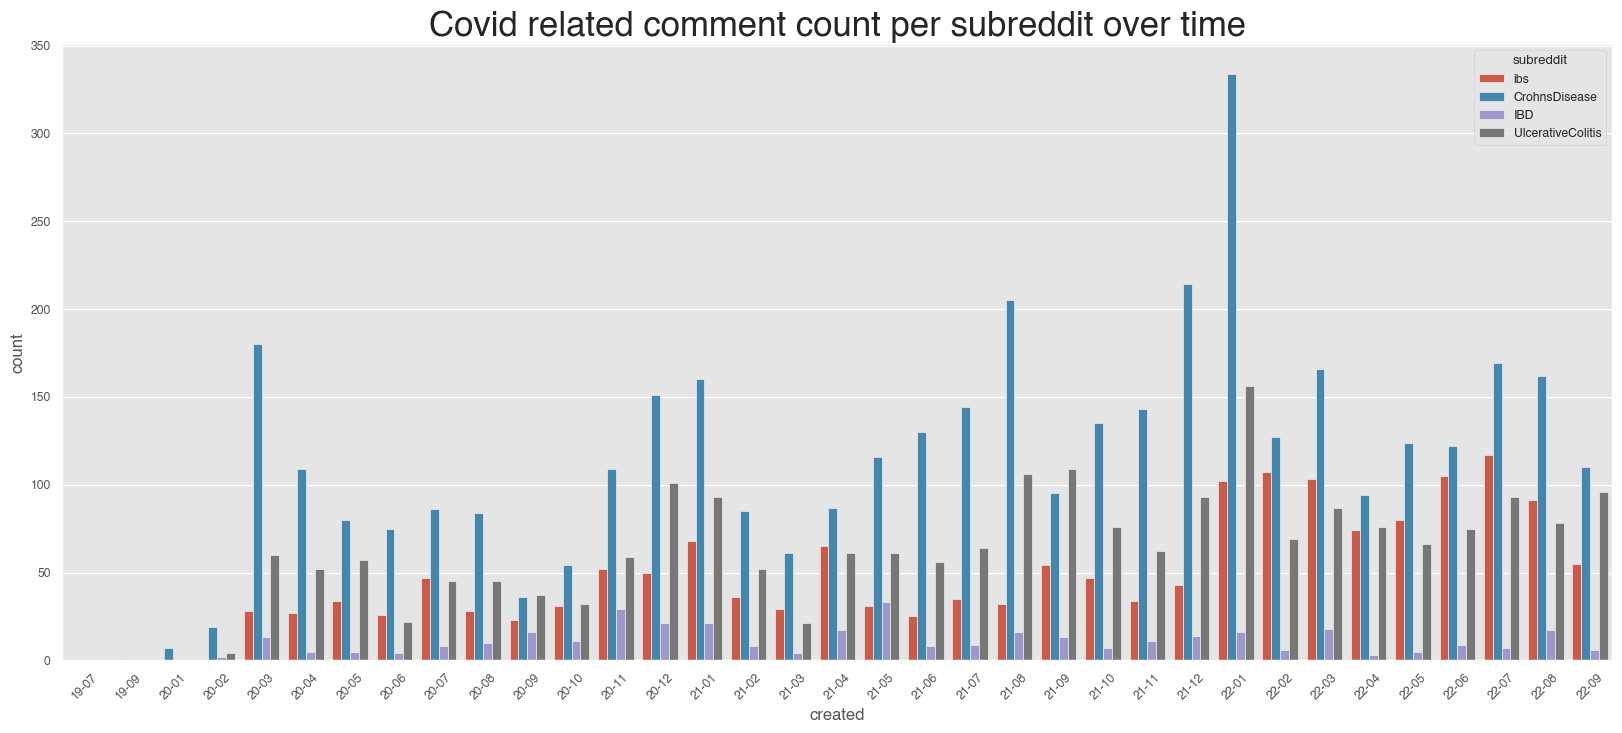

In [41]:
df_c_comm_covid.sort_values('created', inplace=True)

fig, ax = plt.subplots(figsize=(20,8))

plt.title('Covid related comment count per subreddit over time', fontsize=25)
sns.countplot(data=df_c_comm_covid, hue='subreddit', x='created')
plt.xticks(rotation=45)

plt.show();

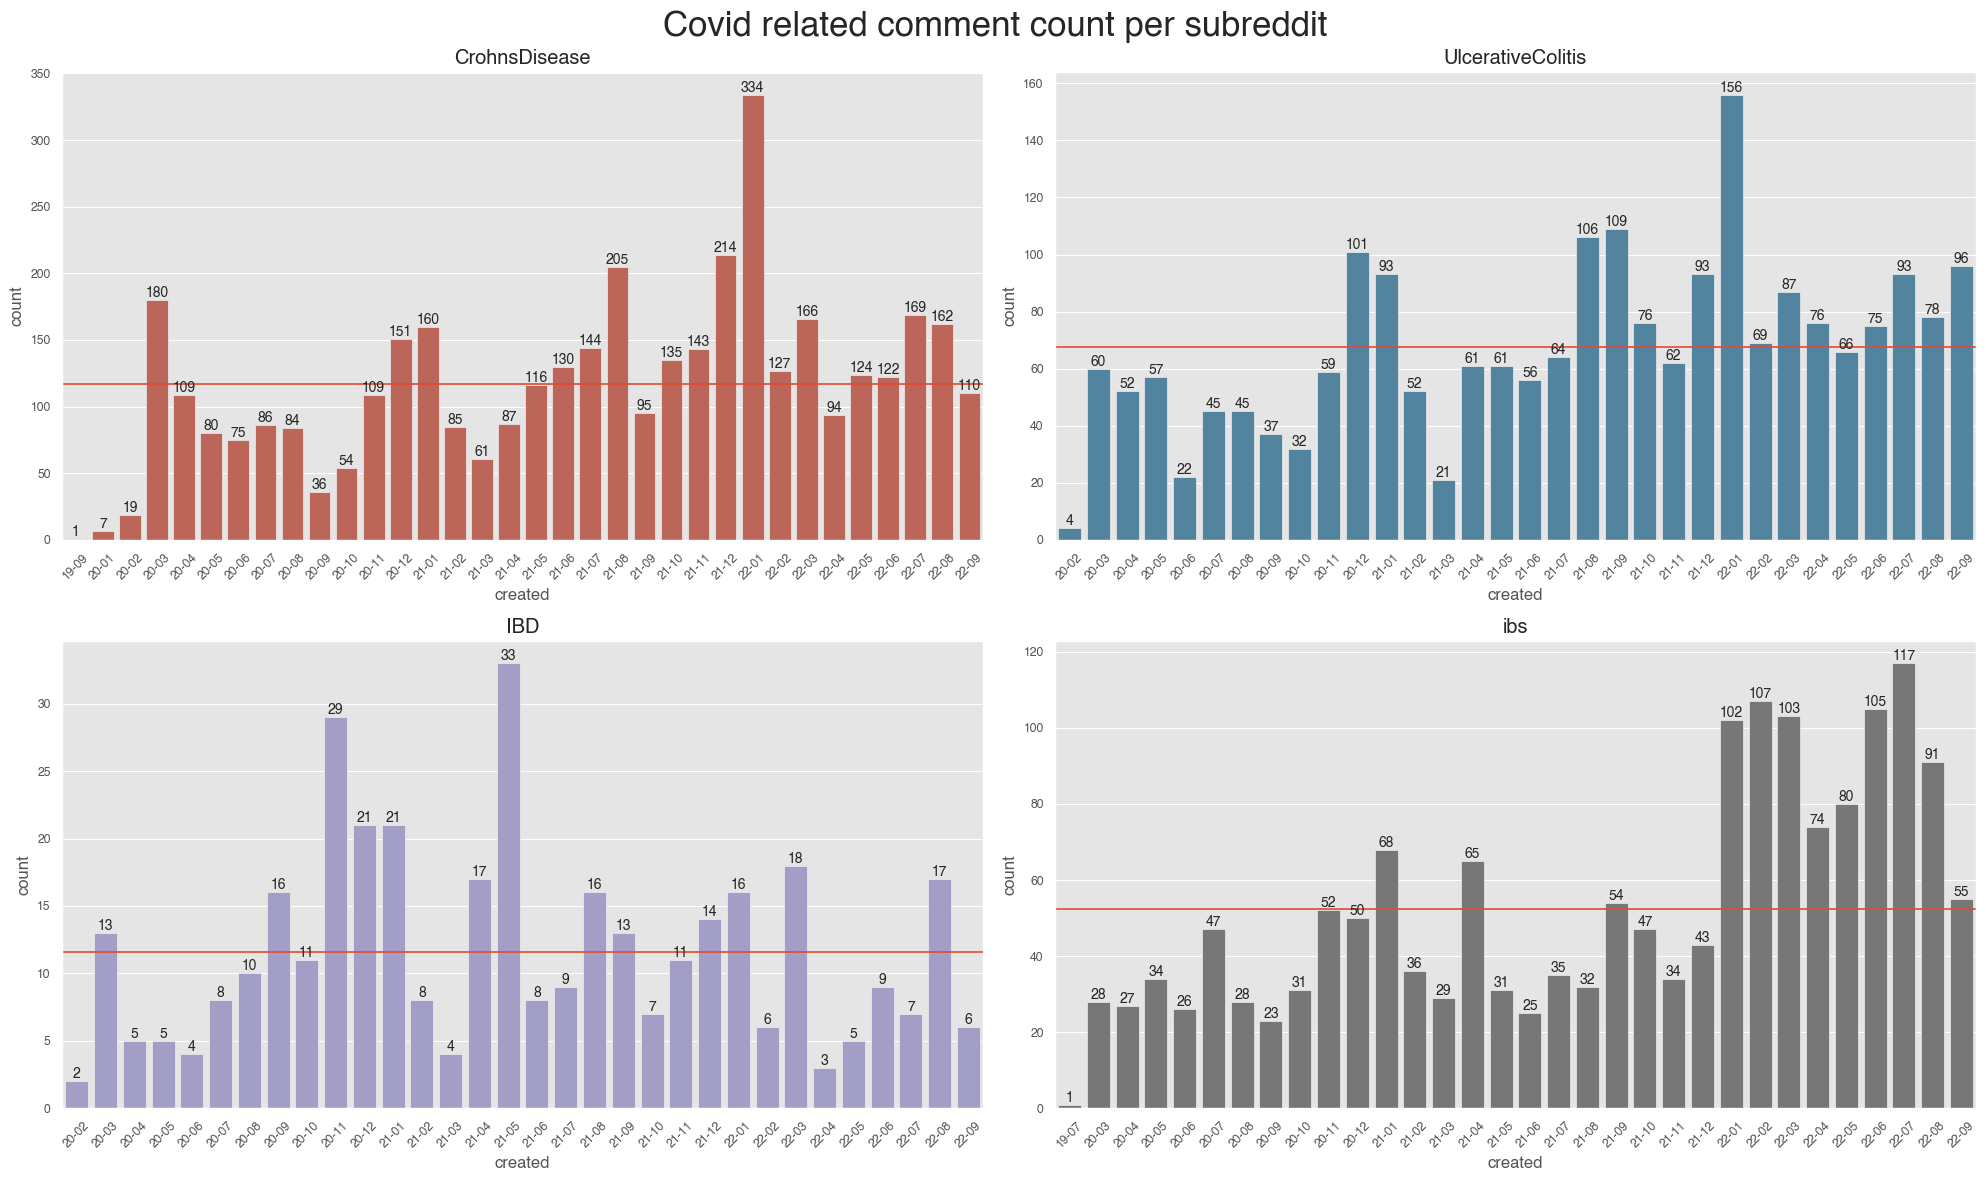

In [42]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(figsize=(20,12), nrows=2, ncols=2)

plt.suptitle('Covid related comment count per subreddit', fontsize=25)

cov_comm_crohn = df_c_comm_covid[df_c_comm_covid['subreddit'] == 'CrohnsDisease'].copy()
cov_comm_crohn.sort_values('created', inplace=True)
sns.countplot(data=cov_comm_crohn, x='created', ax=ax1, color=colors[0])
ax1.axhline(mean(df_c_comm_covid[df_c_comm_covid['subreddit'] == 'CrohnsDisease'].groupby('created').count().id))
ax1.set_title('CrohnsDisease')
ax1.bar_label(ax1.containers[0])
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

cov_comm_ulc = df_c_comm_covid[df_c_comm_covid['subreddit'] == 'UlcerativeColitis'].copy()
cov_comm_ulc.sort_values('created', inplace=True)
sns.countplot(data=cov_comm_ulc, x='created', ax=ax2, color=colors[1])
ax2.axhline(mean(df_c_comm_covid[df_c_comm_covid['subreddit'] == 'UlcerativeColitis'].groupby('created').count().id))
ax2.set_title('UlcerativeColitis')
ax2.bar_label(ax2.containers[0])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

cov_comm_ibd = df_c_comm_covid[df_c_comm_covid['subreddit'] == 'IBD'].copy()
cov_comm_ibd.sort_values('created', inplace=True)
sns.countplot(data=cov_comm_ibd, x='created', ax=ax3, color=colors[2])
ax3.axhline(mean(df_c_comm_covid[df_c_comm_covid['subreddit'] == 'IBD'].groupby('created').count().id))
ax3.set_title('IBD')
ax3.bar_label(ax3.containers[0])
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

cov_comm_ibs = df_c_comm_covid[df_c_comm_covid['subreddit'] == 'ibs'].copy()
cov_comm_ibs.sort_values('created', inplace=True)
sns.countplot(data=cov_comm_ibs, x='created', ax=ax4, color=colors[3])
ax4.axhline(mean(df_c_comm_covid[df_c_comm_covid['subreddit'] == 'ibs'].groupby('created').count().id))
ax4.set_title('ibs')
ax4.bar_label(ax4.containers[0])
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()
plt.show();

In [43]:
fav_posts = df_filtered_covid[['title', 'author', 'subreddit', 'score', 'num_comments']].sort_values(by='score', ascending=False)
fav_posts.dropna(inplace=True)
fav_posts.num_comments = fav_posts.num_comments.astype('int64')
print(colored('\nSubmissions about covid with more upvotes', color='blue'))
display(fav_posts.iloc[0:10])


Submissions about covid with more upvotes


,title,author,subreddit,score,num_comments
12068,I had a mild case and am almost recovered from...,darknessrises8,CrohnsDisease,630,149
434,I'm getting the Pfizer vaccine tomorrow,LetsEatPizza,CrohnsDisease,562,99
8594,You Need To Fight.,YoullForgetAnyways,CrohnsDisease,305,61
291,I've had the Pfizer/BioNTech COVID-19 vaccine!,BodieJaker,CrohnsDisease,279,91
3922,PSA: Endometriosis is commonly misdiagnosed as...,meestahmoostah,ibs,273,57
24030,How many Covid screening tests have you lied on?,Smil3yAngel,ibs,267,57
9915,I’m a fully vaxxed Crohnie and I tested positi...,alaf21,CrohnsDisease,237,35
21275,Can science hurry the *uck up and find a solut...,Ok-Tour-9284,ibs,231,81
5257,"My coworkers want me to go back to the office,...",frozenfruit123,ibs,230,23
9571,Stem Cell Trial Update - Week 12 (They worked!!),AsAGayJewishDemocrat,CrohnsDisease,188,44


### T-test

A t-test is an inferential statistic used to determine if there is a statistically significant difference between the means of two variables.  

We want to check if after covid's spread the affluence in the subreddits grown

In [44]:
import researchpy as rp
import scipy.stats as stats

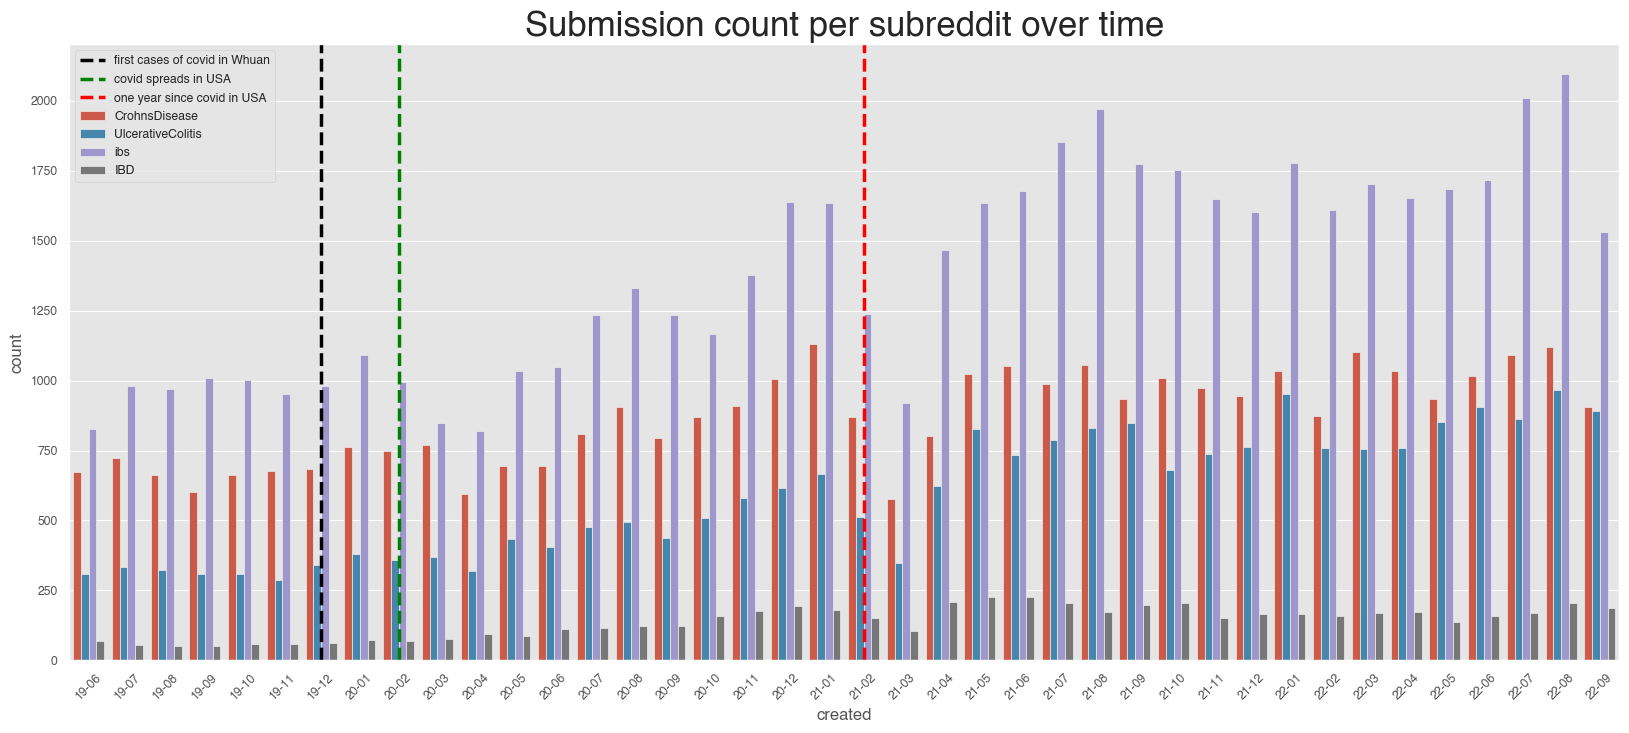

In [45]:
fig, ax = plt.subplots(figsize=(20,8))

df_c.sort_values('created', inplace=True)

plt.title('Submission count per subreddit over time', fontsize=25)
sns.countplot(data=df_c, hue='subreddit', x='created', ax=ax)
ax.axvline(x=6, linestyle='--', linewidth=2.5, color='black', label='first cases of covid in Whuan')
ax.axvline(x=8, linestyle='--', linewidth=2.5, color='green', label='covid spreads in USA')
ax.axvline(x=20, linestyle='--', linewidth=2.5, color='red', label='one year since covid in USA')
plt.xticks(rotation=45)

plt.legend()
plt.show();

In [46]:
df_sub_count_per_month = df_c.copy()
df_sub_count_per_month = df_sub_count_per_month.groupby('created').count().reset_index()
df_sub_count_per_month.drop(columns=['title', 'author', 'score', 'num_comments', 'url', 'body'], inplace=True)
df_sub_count_per_month.columns = ['month', 'count', 'subreddit']

bef_cov = df_sub_count_per_month['count'][df_sub_count_per_month['month'] <= '20-02']
aft_cov = df_sub_count_per_month['count'][df_sub_count_per_month['month'] > '20-02']
one_year_cov = df_sub_count_per_month['count'][(df_sub_count_per_month['month'] > '20-02') & (df_sub_count_per_month['month'] <= '21-02')]

**Independent T-test on submissions**: covid before and after monthly count

In [47]:
%%capture
summary, results = rp.ttest(group1 = bef_cov, group1_name= 'sub before covid',
     group2 = aft_cov, group2_name='sub after covid')

In [48]:
display(summary)
display(results)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,sub before covid,9.0,2055.333333,124.618418,41.539473,1959.543138,2151.123529
1,sub after covid,31.0,3253.903226,687.261782,123.435860,3001.813569,3505.992883
2,combined,40.0,2984.225000,789.582411,124.843941,2731.704295,3236.745705


,Independent t-test,results
0,Difference (sub before covid - sub after covid...,-1198.5699
1,Degrees of freedom =,38.0000
2,t =,-5.1612
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-1.9542
7,Hedge's g =,-1.9154
8,Glass's delta1 =,-9.6179
9,Point-Biserial r =,-0.6420


In [49]:
stats.ttest_ind(bef_cov, aft_cov)

Ttest_indResult(statistic=-5.161178146259493, pvalue=8.016368611351038e-06)

**Independent T-test on submissions**: covid before and ***after one year*** monthly count

In [50]:
%%capture
summary, results = rp.ttest(group1=bef_cov, group1_name= 'sub before covid', 
                            group2=one_year_cov, group2_name='sub after one year of covid')

In [51]:
display(summary)
display(results)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,sub before covid,9.0,2055.333333,124.618418,41.539473,1959.543138,2151.123529
1,sub after one year of covid,12.0,2671.583333,532.704840,153.778641,2333.118825,3010.047841
2,combined,21.0,2407.476190,509.844547,111.257201,2175.397735,2639.554646


,Independent t-test,results
0,Difference (sub before covid - sub after one y...,-616.2500
1,Degrees of freedom =,19.0000
2,t =,-3.3813
3,Two side test p value =,0.0031
4,Difference < 0 p value =,0.0016
5,Difference > 0 p value =,0.9984
6,Cohen's d =,-1.4910
7,Hedge's g =,-1.4314
8,Glass's delta1 =,-4.9451
9,Point-Biserial r =,-0.6129


In [52]:
stats.ttest_ind(bef_cov, one_year_cov)

Ttest_indResult(statistic=-3.381255333661818, pvalue=0.0031345415459062003)

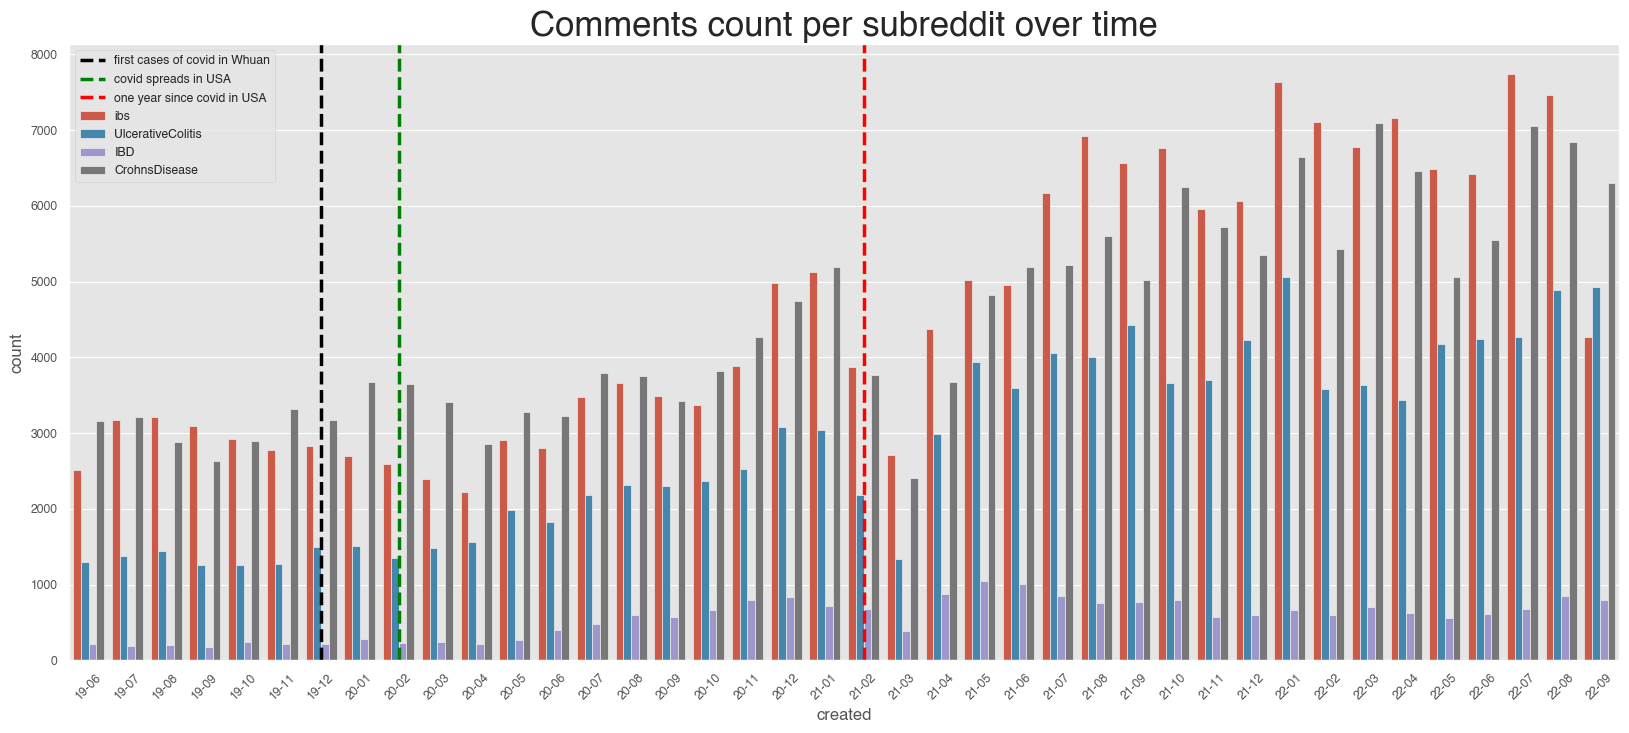

In [53]:
fig, ax = plt.subplots(figsize=(20,8))

df_c_c.sort_values('created', inplace=True)

plt.title('Comments count per subreddit over time', fontsize=25)
sns.countplot(data=df_c_c, hue='subreddit', x='created', ax=ax)
ax.axvline(x=6, linestyle='--', linewidth=2.5, color='black', label='first cases of covid in Whuan')
ax.axvline(x=8, linestyle='--', linewidth=2.5, color='green', label='covid spreads in USA')
ax.axvline(x=20, linestyle='--', linewidth=2.5, color='red', label='one year since covid in USA')
plt.xticks(rotation=45)

plt.legend()
plt.show();

In [54]:
df_comm_count_per_month = df_c_c.copy()
df_comm_count_per_month = df_comm_count_per_month.groupby('created').count().reset_index()
df_comm_count_per_month.drop(columns=['parent_id', 'author', 'score', 'body', 'subreddit'], inplace=True)
df_comm_count_per_month.columns = ['month', 'count']

comm_bef_cov = df_comm_count_per_month['count'][df_comm_count_per_month['month'] <= '20-02']
comm_aft_cov = df_comm_count_per_month['count'][df_comm_count_per_month['month'] > '20-02']
comm_one_year_cov = df_comm_count_per_month['count'][(df_comm_count_per_month['month'] > '20-02') & (df_comm_count_per_month['month'] <= '21-02')]

**Independent t-test on comments**: before and after covid

In [55]:
%%capture
summary, results = rp.ttest(group1=comm_bef_cov, group1_name='comments before covid', 
                            group2=comm_aft_cov, group2_name='comments after covid')

In [56]:
display(summary)
display(results)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,comments before covid,9.0,7629.777778,352.540344,117.513448,7358.791280,7900.764275
1,comments after covid,31.0,13910.741935,4085.664450,733.806998,12412.108116,15409.375755
2,combined,40.0,12497.525000,4463.358543,705.718951,11070.073692,13924.976308


,Independent t-test,results
0,Difference (comments before covid - comments a...,-6280.9642
1,Degrees of freedom =,38.0000
2,t =,-4.5650
3,Two side test p value =,0.0001
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-1.7285
7,Hedge's g =,-1.6941
8,Glass's delta1 =,-17.8163
9,Point-Biserial r =,-0.5951


In [57]:
stats.ttest_ind(comm_bef_cov, comm_aft_cov)

Ttest_indResult(statistic=-4.564951699133133, pvalue=5.115103490711879e-05)

**Independent t-test on comments**: before and ***after one year*** of covid

In [58]:
%%capture
summary, results = rp.ttest(group1=comm_bef_cov, group1_name='comments before covid', 
                            group2=comm_one_year_cov, group2_name='comments after covid')

In [59]:
display(summary)
display(results)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,comments before covid,9.0,7629.777778,352.540344,117.513448,7358.791280,7900.764275
1,comments after covid,12.0,10089.250000,2213.390165,638.950704,8682.928983,11495.571017
2,combined,21.0,9035.190476,2073.565712,452.489135,8091.314680,9979.066272


,Independent t-test,results
0,Difference (comments before covid - comments a...,-2459.4722
1,Degrees of freedom =,19.0000
2,t =,-3.2817
3,Two side test p value =,0.0039
4,Difference < 0 p value =,0.0020
5,Difference > 0 p value =,0.9980
6,Cohen's d =,-1.4471
7,Hedge's g =,-1.3892
8,Glass's delta1 =,-6.9764
9,Point-Biserial r =,-0.6015


In [60]:
stats.ttest_ind(comm_bef_cov, comm_one_year_cov)

Ttest_indResult(statistic=-3.2816839592743943, pvalue=0.0039238927848484)

### T-test comparing subreddits

In [61]:
sub_before_covid = df_c.groupby(['created', 'subreddit']).count()
sub_before_covid.reset_index(inplace=True)
sub_before_covid.drop(columns=['title', 'author', 'score', 'url', 'num_comments', 'body'], inplace=True)
sub_before_covid.columns = ['created', 'subreddit', 'count']
sub_before_covid = sub_before_covid[sub_before_covid['created'] <= '20-02']

sub_after_covid = df_c.groupby(['created', 'subreddit']).count()
sub_after_covid.reset_index(inplace=True)
sub_after_covid.drop(columns=['title', 'author', 'score', 'url', 'num_comments', 'body'], inplace=True)
sub_after_covid.columns = ['created', 'subreddit', 'count']
sub_after_covid = sub_after_covid[sub_after_covid['created'] > '20-02']

sub_one_year_covid = df_c.groupby(['created', 'subreddit']).count()
sub_one_year_covid.reset_index(inplace=True)
sub_one_year_covid.drop(columns=['title', 'author', 'score', 'url', 'num_comments', 'body'], inplace=True)
sub_one_year_covid.columns = ['created', 'subreddit', 'count']
sub_one_year_covid = sub_one_year_covid[(sub_one_year_covid['created'] > '20-02') & (sub_one_year_covid['created'] <= '21-02')]

comm_before_covid = df_c_c.groupby(['created', 'subreddit']).count()
comm_before_covid.reset_index(inplace=True)
comm_before_covid.drop(columns=['parent_id', 'author', 'score', 'body'], inplace=True)
comm_before_covid.columns = ['created', 'subreddit', 'count']
comm_before_covid = comm_before_covid[comm_before_covid['created'] <= '20-02']

comm_after_covid = df_c_c.groupby(['created', 'subreddit']).count()
comm_after_covid.reset_index(inplace=True)
comm_after_covid.drop(columns=['parent_id', 'author', 'score', 'body'], inplace=True)
comm_after_covid.columns = ['created', 'subreddit', 'count']
comm_after_covid = comm_after_covid[comm_after_covid['created'] > '20-02']

comm_one_year_covid = df_c_c.groupby(['created', 'subreddit']).count()
comm_one_year_covid.reset_index(inplace=True)
comm_one_year_covid.drop(columns=['parent_id', 'author', 'score', 'body'], inplace=True)
comm_one_year_covid.columns = ['created', 'subreddit', 'count']
comm_one_year_covid = comm_one_year_covid[(comm_one_year_covid['created'] > '20-02') & (comm_one_year_covid['created'] <= '21-02')]

In [62]:
p_values = []

for sr in subreddits:
    a = sub_before_covid[sub_before_covid['subreddit'] == sr]['count']
    b = sub_after_covid[sub_after_covid['subreddit'] == sr]['count']
    p_values.append((stats.ttest_ind(a, b).pvalue, sr, 'full period (Feb 2020 to Sept 2022)'))

for sr in subreddits:
    a = sub_before_covid[sub_before_covid['subreddit'] == sr]['count']
    b = sub_one_year_covid[sub_one_year_covid['subreddit'] == sr]['count']
    p_values.append((stats.ttest_ind(a, b).pvalue, sr, 'one year (Feb 2020 to Feb 2021)'))
    
p_values = pd.DataFrame(p_values, columns=['p_value', 'subreddit', 'type'])

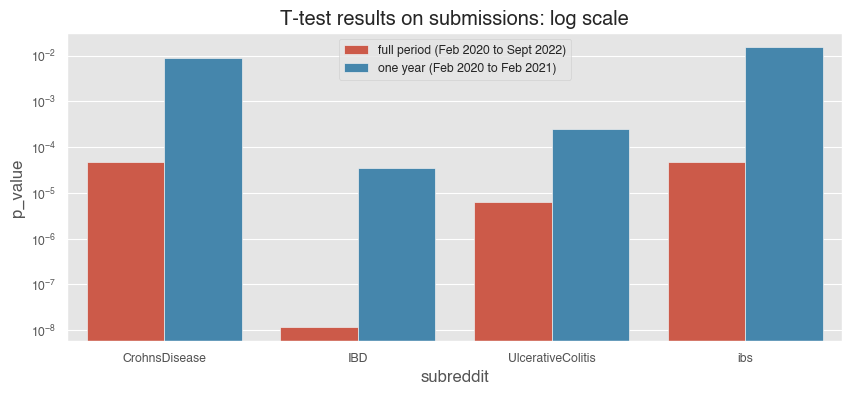

In [63]:
fig, ax = plt.subplots(figsize=(10,4))

plt.title('T-test results on submissions: log scale')
sns.barplot(data=p_values, hue='type', x=p_values.subreddit, y=p_values.p_value, log=True)

plt.legend()
plt.show();

In [64]:
p_values = []

for sr in subreddits:
    a = comm_before_covid[comm_before_covid['subreddit'] == sr]['count']
    b = comm_after_covid[comm_after_covid['subreddit'] == sr]['count']
    p_values.append((stats.ttest_ind(a, b).pvalue, sr, 'full period (Feb 2020 to Sept 2022)'))

for sr in subreddits:
    a = comm_before_covid[sub_before_covid['subreddit'] == sr]['count']
    b = comm_one_year_covid[comm_one_year_covid['subreddit'] == sr]['count']
    p_values.append((stats.ttest_ind(a, b).pvalue, sr, 'one year (Feb 2020 to Feb 2021)'))
    
p_values = pd.DataFrame(p_values, columns=['p_value', 'subreddit', 'type'])

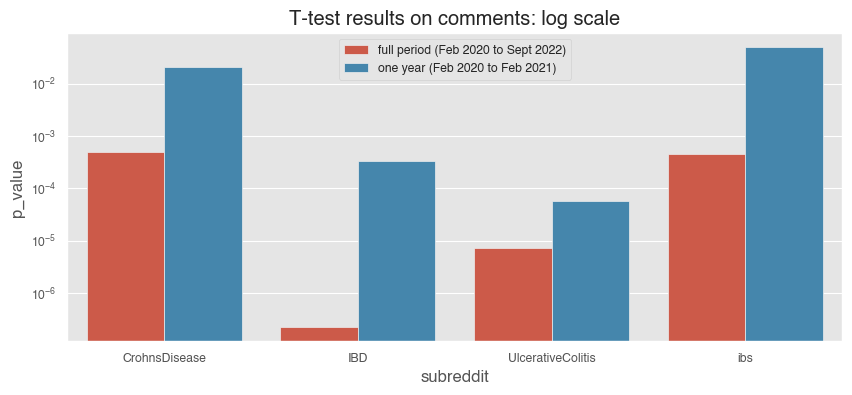

In [65]:
fig, ax = plt.subplots(figsize=(10,4))

plt.title('T-test results on comments: log scale')
sns.barplot(data=p_values, hue='type', x=p_values.subreddit, y=p_values.p_value, log=True)

plt.legend()
plt.show();